In [5]:
"""
Created on Wed Mar 30 19:23:12 2022

@author: yalud

General description:
This function generates two spike trains for two electrically stimulated neurons
Neuron A excites neuron B

Input:
    experiment general definitions (number of Trials and trial duration)
    firing rates of each neuron and corresponding durstions of response to stimulus and to excitation
Output:
    CSV files of stimulus onsets and spike trains of each neuron
"""
import matplotlib.pyplot as plt
import numpy as np
import math
import csv

In [6]:
###definitions:

#experiment general definitions:
numOfTrials=500
duration=100000 #in ms

#Stim onsets
stimOnsets=np.round(np.random.uniform(low=100,high=(duration-10000),size=(numOfTrials,))).astype(int)

#Neurons definitions:

#Neuron A
r0Neuron1=60 #baseline firing rate
rStimNeuron1=90 #firing rate after stimulation
stimDurNeuron1=50 #in ms, duration of stimulation
stimDelayNeuron1=0 #delay time until stimulation of the neuron

#Neuron B
r0Neuron2=50
rStimNeuron2=100
stimDurNeuron2=50 
stimDelayNeuron2=10
rExited2addNeuron2=20 #firing rate to add due to excitation from neuron A
excitationDur=25 #in ms, duration of excitation

###end of definitions


In [7]:
#simulation of the spike trains:
trialVecs1=np.zeros([duration,numOfTrials])
trialVecs2=np.zeros([duration,numOfTrials])
for trial_id in range(numOfTrials):
    if trial_id%10==0:
        print(trial_id)
    trialPoissonVecNeuron1=np.zeros([duration,1])
    trialPoissonVecNeuron2=np.zeros([duration,1])
    stimOnset=stimOnsets[trial_id]
    idx=1
    while idx<duration:
        if idx-stimOnset-stimDelayNeuron1<=stimDurNeuron1 and (idx-stimOnset-stimDelayNeuron1>0):
            rateNeuron1=rStimNeuron1
        else:
            rateNeuron1=r0Neuron1
        
        binProb=rateNeuron1/1000;
        randNum=np.random.uniform(low=0,high=1)
        if randNum<=binProb:
            trialPoissonVecNeuron1[idx]=1
        
        if idx-stimOnset-stimDelayNeuron2<=stimDurNeuron2 and (idx-stimOnset-stimDelayNeuron2>0):
            rateNeuron2=rStimNeuron2
        else:
            rateNeuron2=r0Neuron2
        
        if idx>0 and np.isin(1,trialPoissonVecNeuron1[idx-1:idx-excitationDur]):
            rateNeuron2=rateNeuron2+rExited2addNeuron2
        
        binProb=rateNeuron2/1000;
        randNum=np.random.uniform(low=0,high=1)
        if randNum<=binProb:
            trialPoissonVecNeuron2[idx]=1
        
        idx=idx+1;
    trialVecs1[:,trial_id]=trialPoissonVecNeuron1.ravel()
    trialVecs2[:,trial_id]=trialPoissonVecNeuron2.ravel()


0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490


In [25]:

#to save as a CSV the data
'''
np.savetxt('stimOnsets.csv', stimOnsets,delimiter=',')
np.savetxt('psthDataNeuronA.csv', trialVecs1,delimiter=',')
np.savetxt('psthDataNeuronB.csv', trialVecs2,delimiter=',')
'''

#basic scripts to check the spike trains visually:
# plt.figure
# plt.scatter(range(100),trialVecs1[range(100),1])
# plt.scatter(range(100),trialVecs2[range(100),1])

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

In [24]:

'''
This function get a trial and a time of stimuli and cut the relevant time according to my definitions.
'''
def align_trials(neural_activity, stimuli_time, num_trials):
    aligned_trial = []
    
    for i, stim in enumerate(stimuli_time):
        stim = int(stim)
        temp_trial = neural_activity[stim-50:stim+150, i]
        num_of_spike = np.sum(temp_trial)
        temp_trial = temp_trial*(1000/num_of_spike)
        temp_trial = temp_trial.tolist()
        aligned_trial.append(temp_trial)
                
    return aligned_trial

In [34]:
mat1 = align_trials(trialVecs1,stimOnsets,numOfTrials)
mat1 = np.array(mat1)
mat2 = align_trials(trialVecs2,stimOnsets,numOfTrials)
mat2 = np.array(mat2)

In [35]:
'''
This function gets an array and find according to a bin size a max fire rate and its index of start
'''
def find_max_fire(arr):
    bin_size = 8
    index = 0
    max_fire = 0
    max_fire_index = 0
    list_of_all_rates = []

    while index < 150:
        temp_max = np.mean(arr[index:index+bin_size])
        list_of_all_rates.append(temp_max)
        if temp_max > max_fire:
            max_fire = temp_max
            max_fire_index = index
        index += 1
    return (max_fire, max_fire_index, list_of_all_rates)

In [36]:
'''
This function gets an array and find according to a bin size a min fire rate and its index of start
'''
def find_min_fire(arr, num_indexes_to_reduce):
    bin_size = 8
    index = 0
    min_fire = 100000000
    min_fire_index = 0
    while index < 150-num_indexes_to_reduce:
        temp_min = np.mean(arr[index:index+bin_size])
        if temp_min < min_fire:
            min_fire = temp_min
            min_fire_index = index
        index += 1
    return (min_fire, min_fire_index)

/var/folders/zx/4crzfjcj5z1bc5krk4ps21lh0000gq/T/ipykernel_53650/2197603656.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax = plt.subplots(figsize=(10,3))


267
396


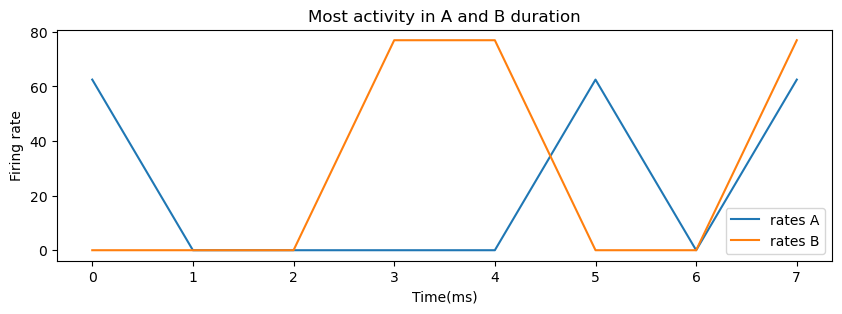

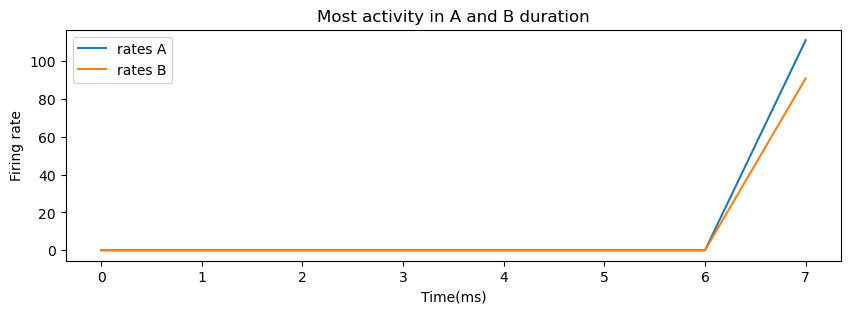

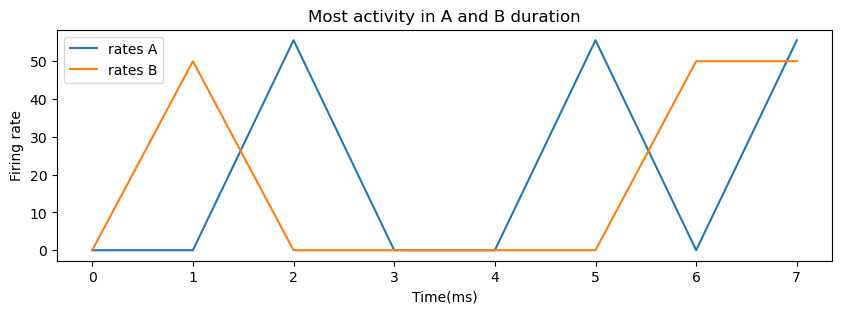

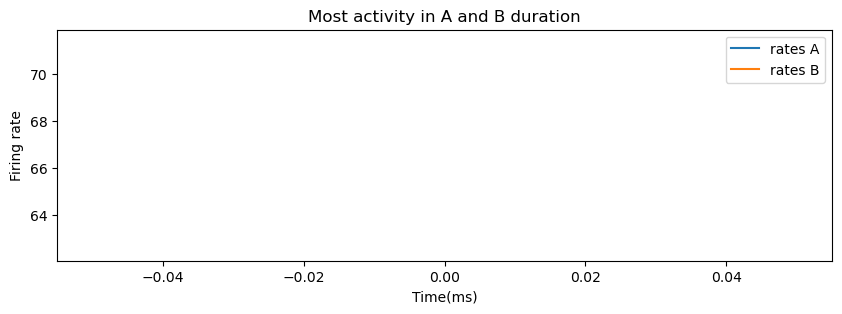

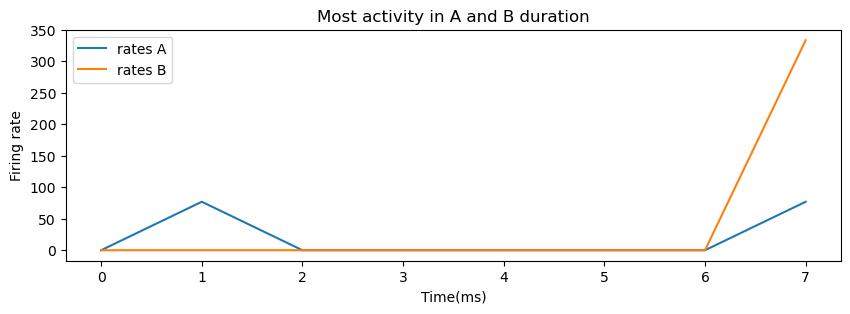

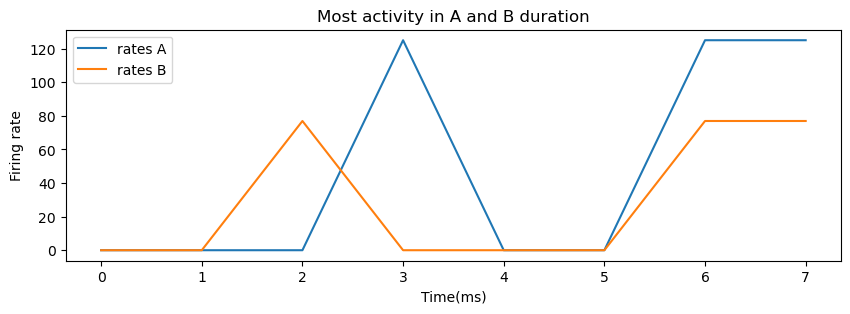

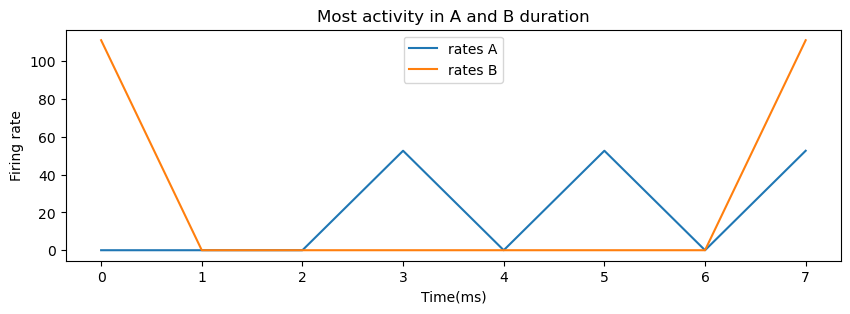

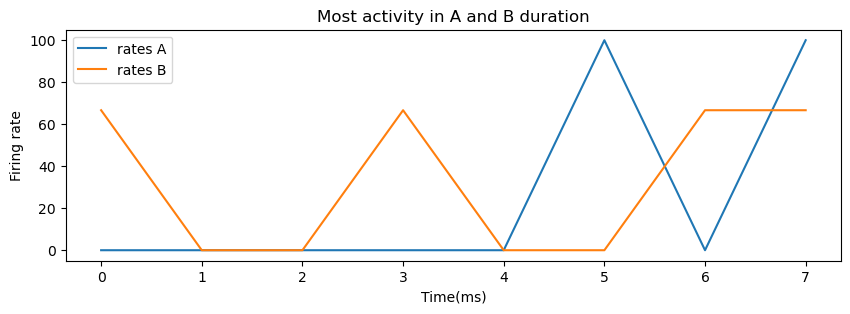

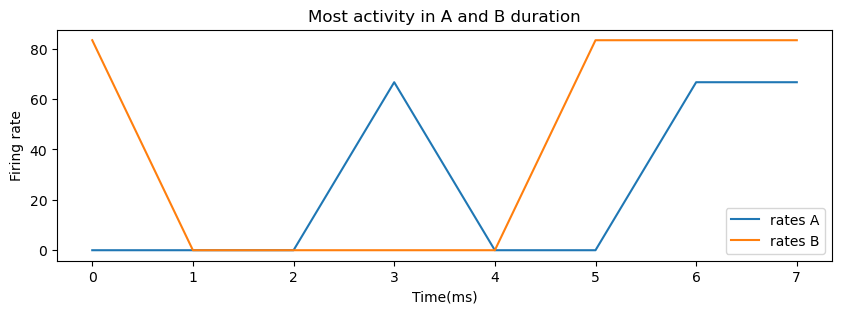

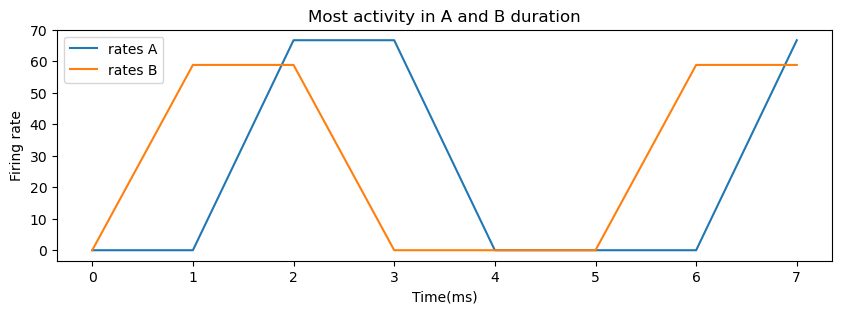

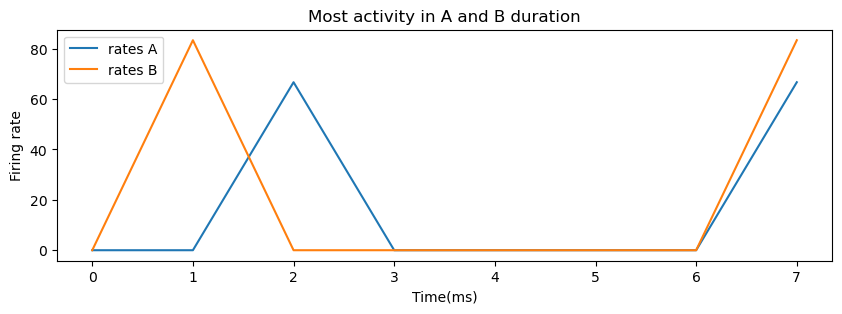

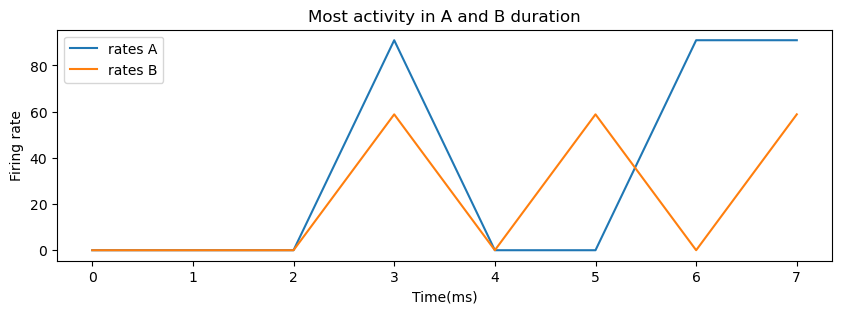

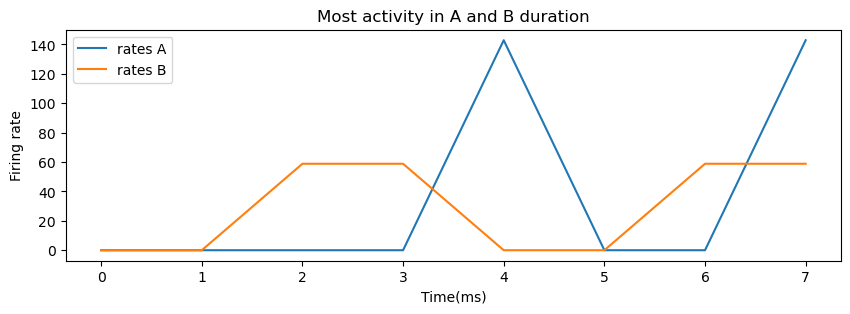

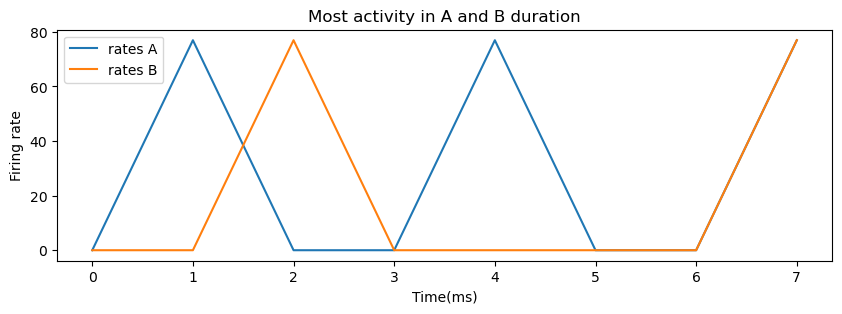

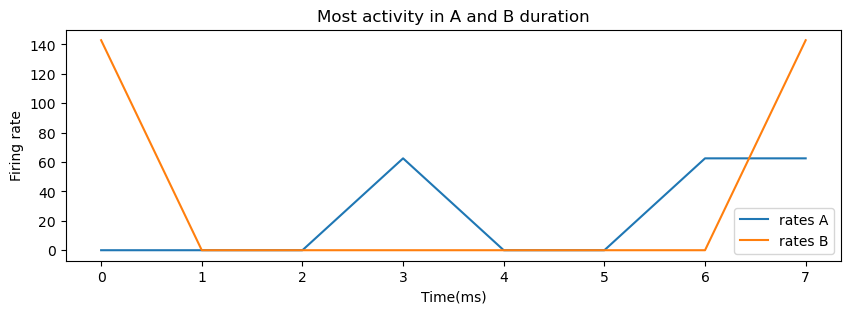

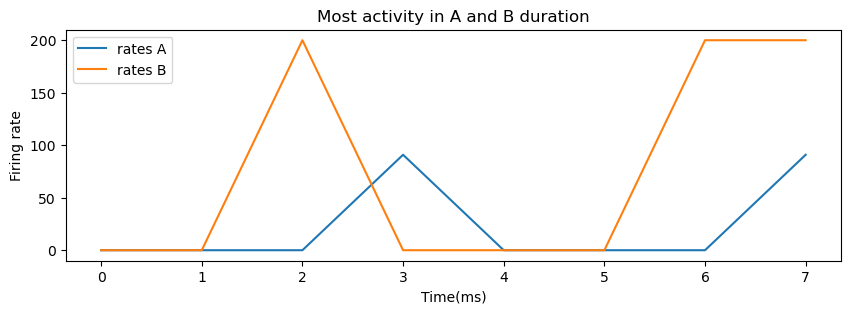

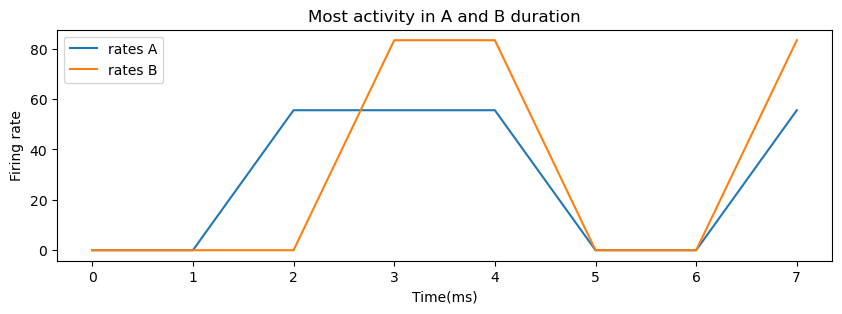

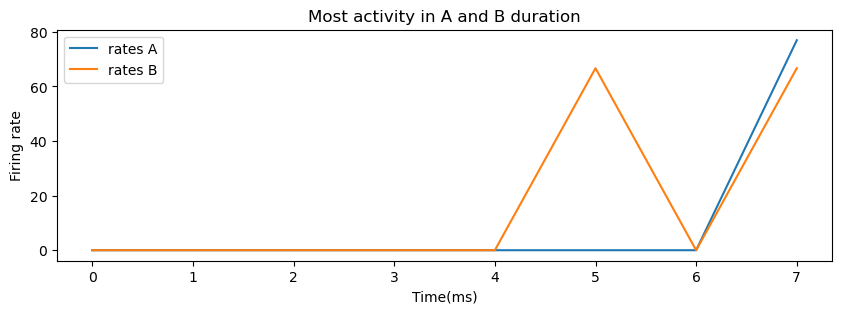

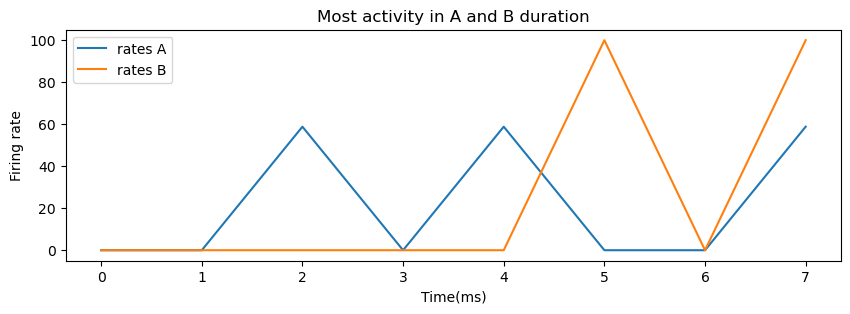

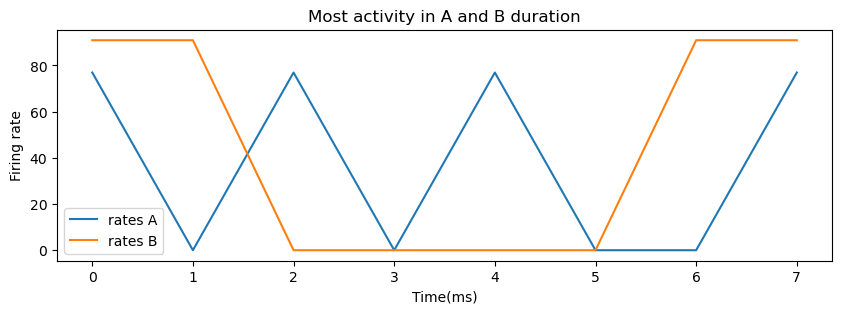

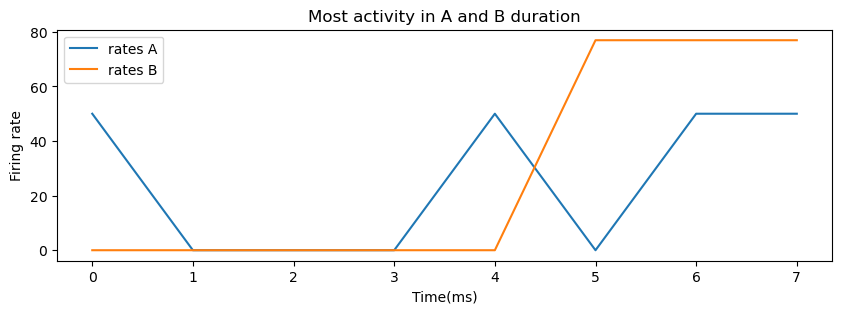

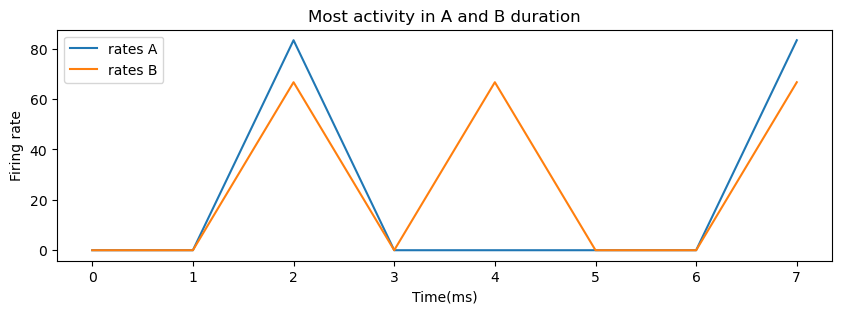

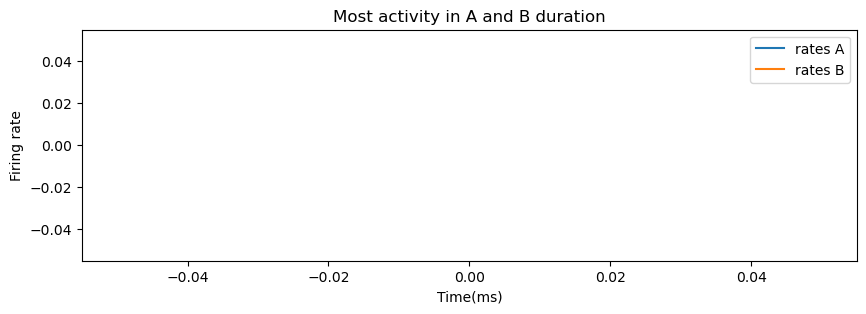

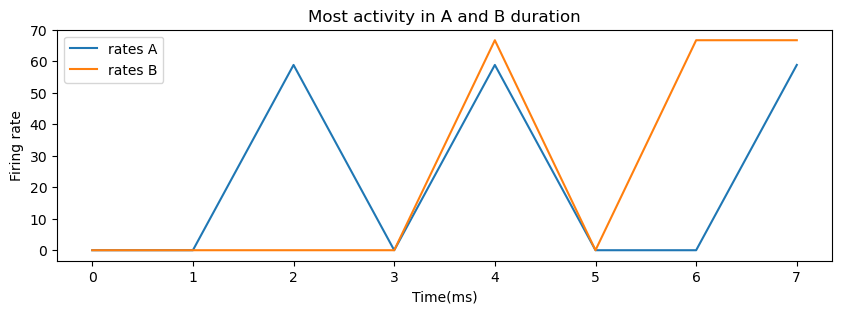

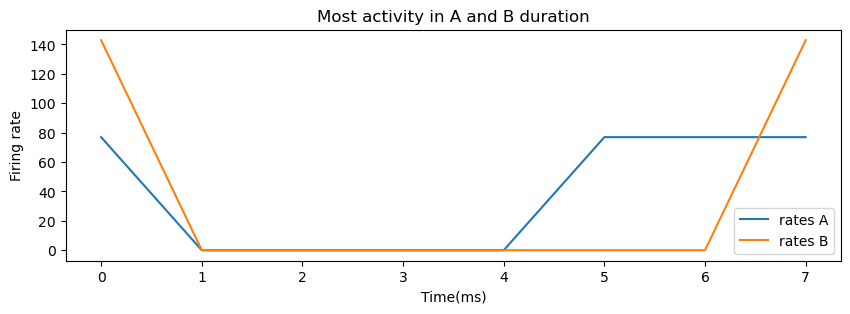

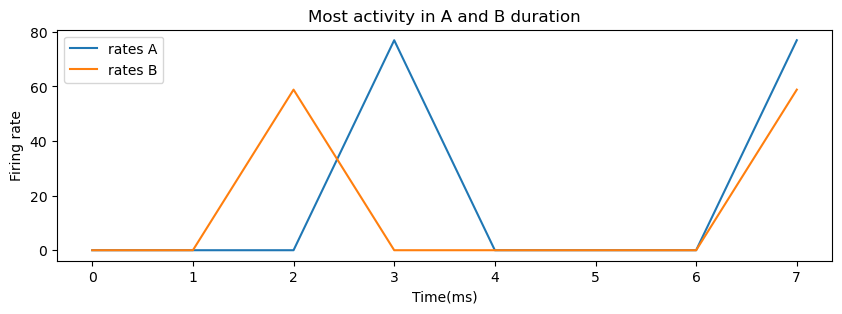

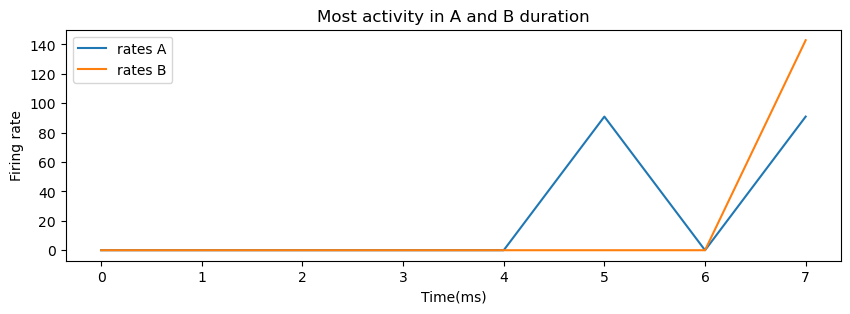

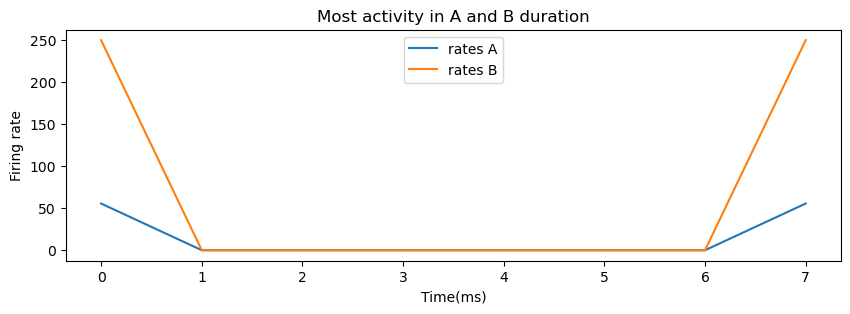

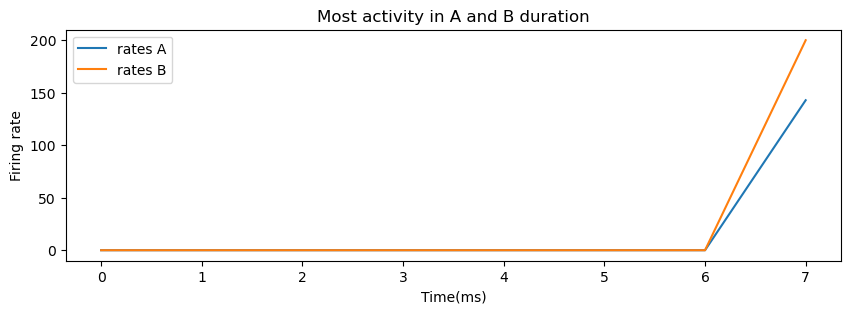

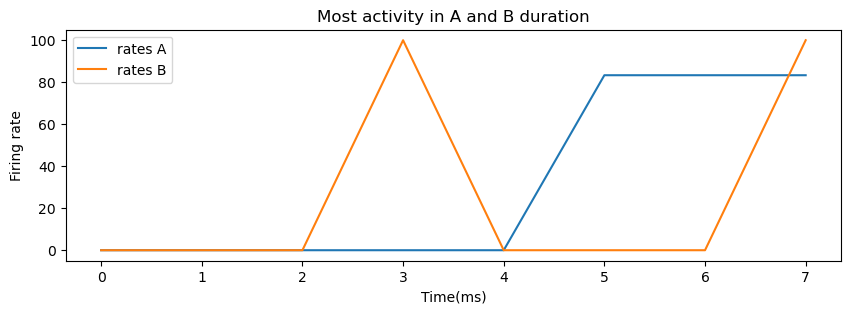

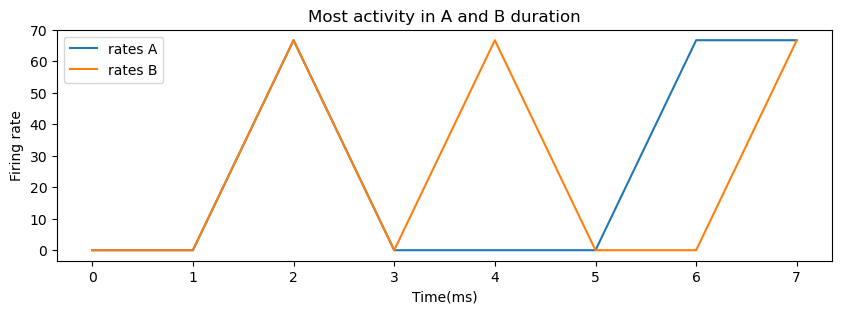

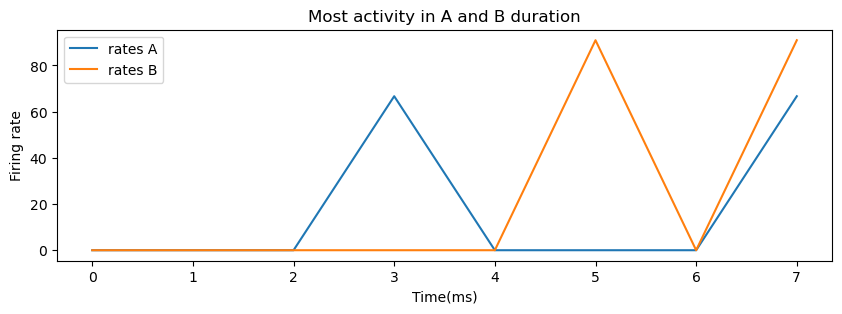

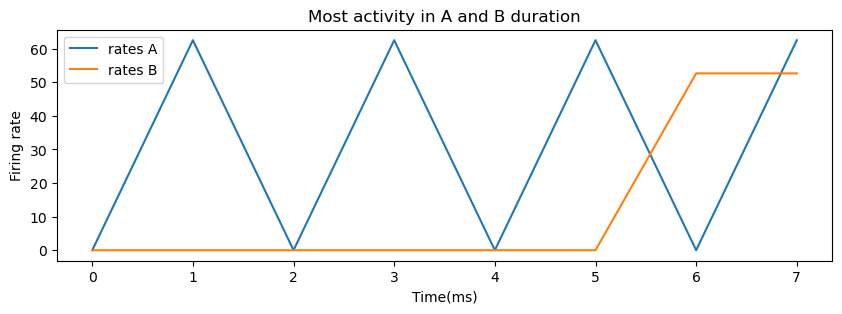

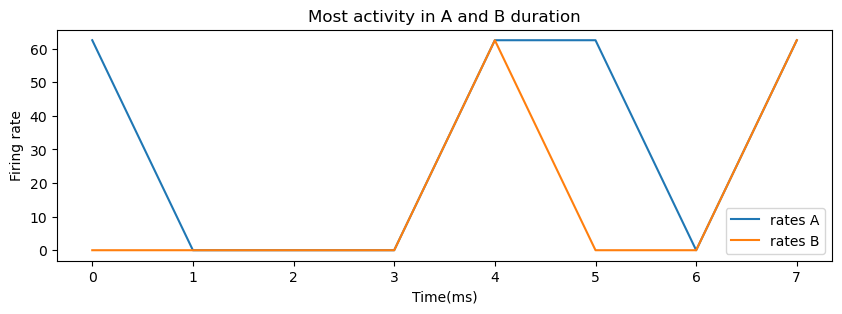

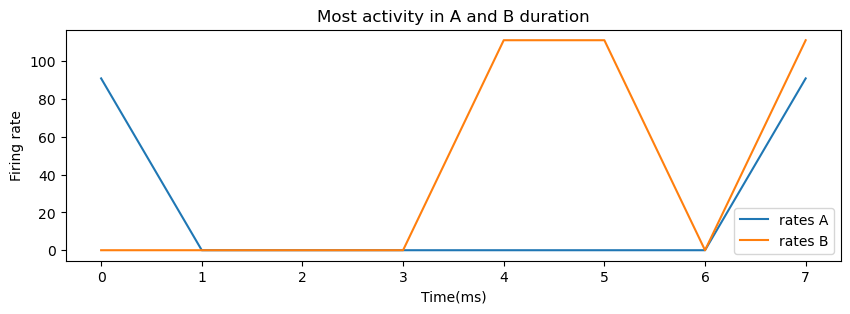

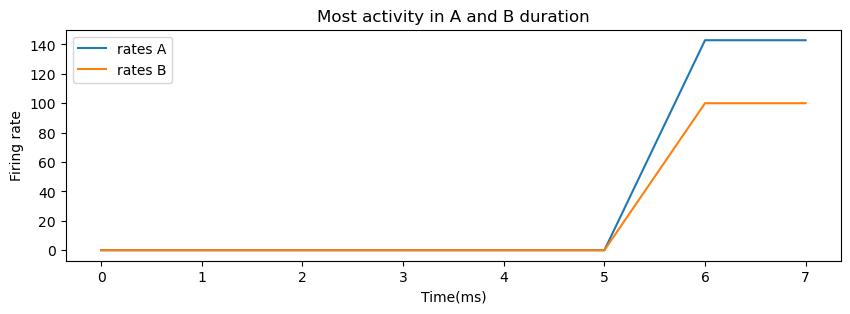

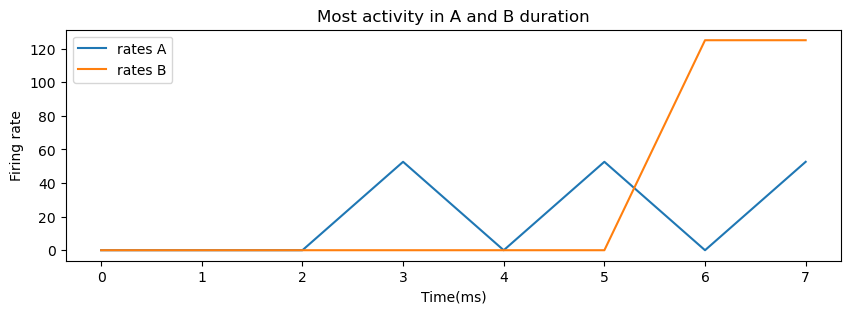

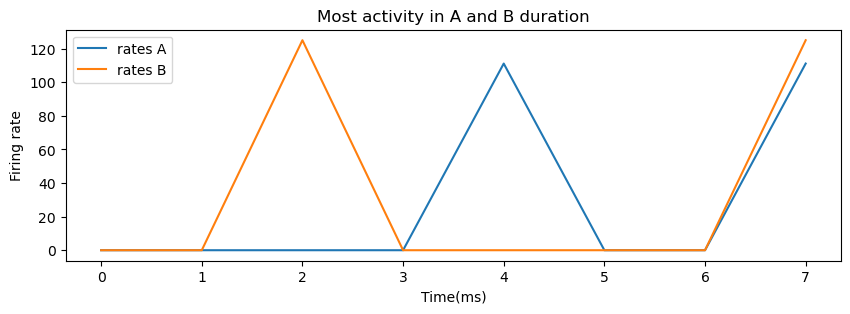

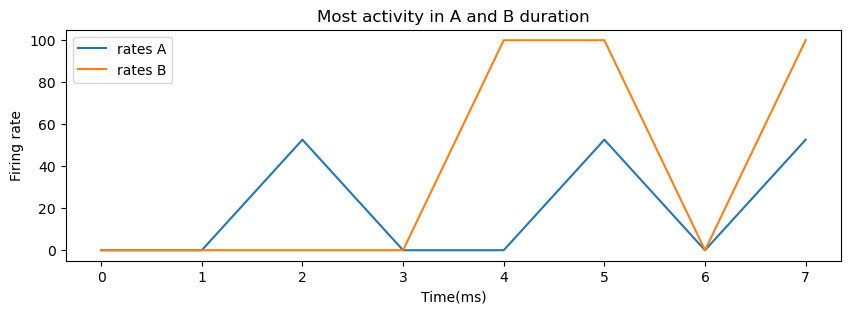

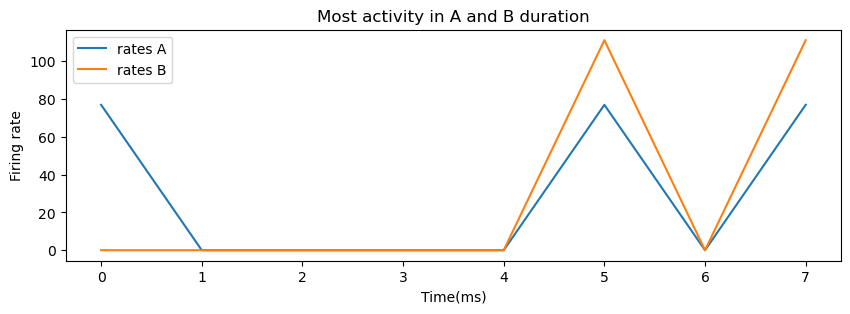

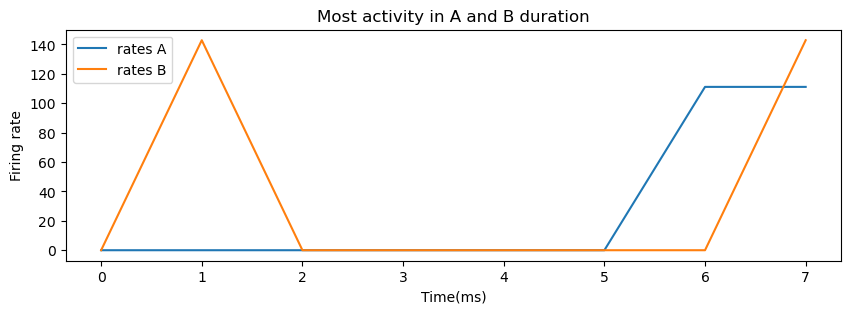

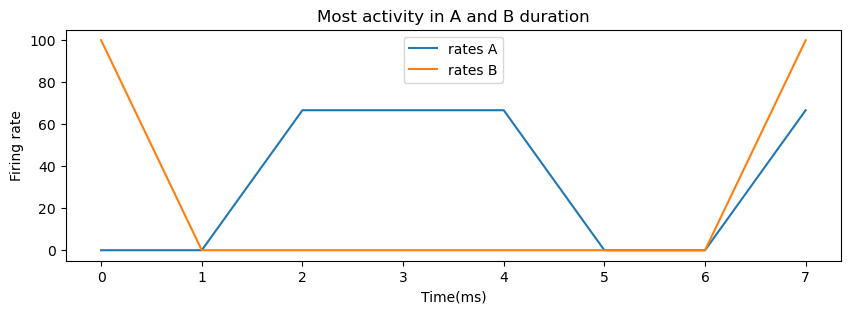

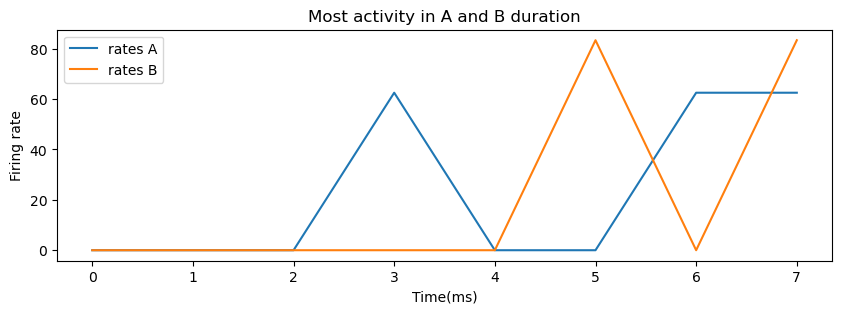

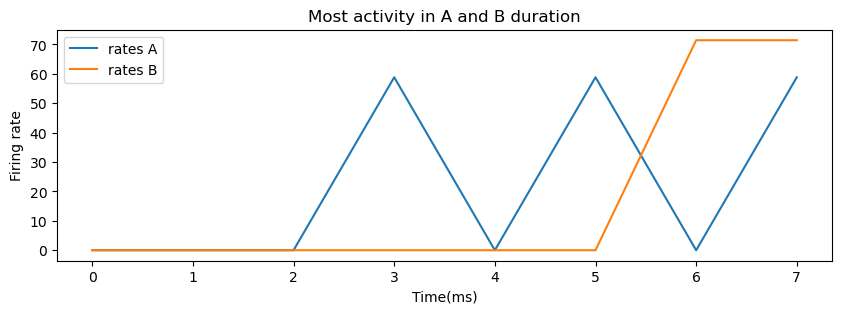

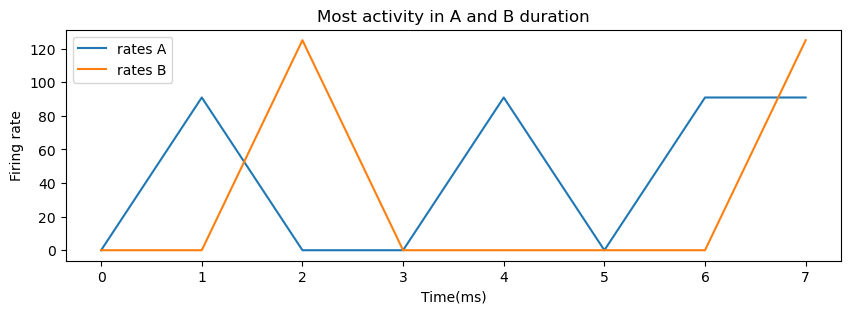

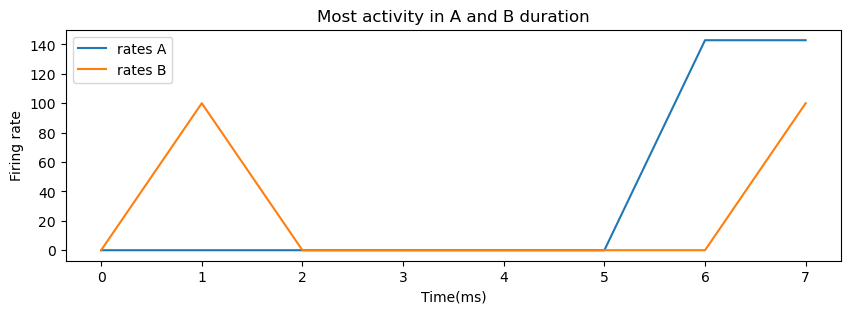

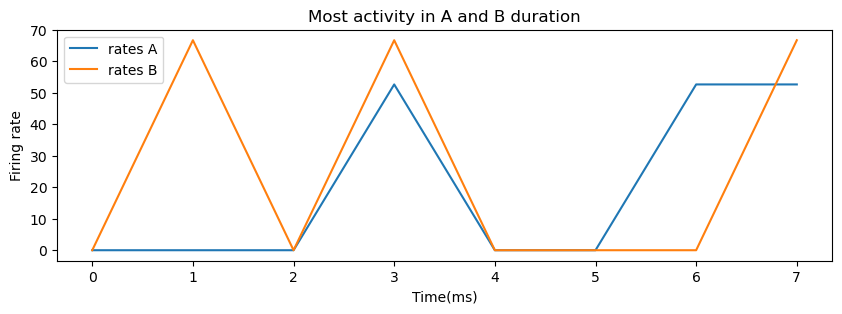

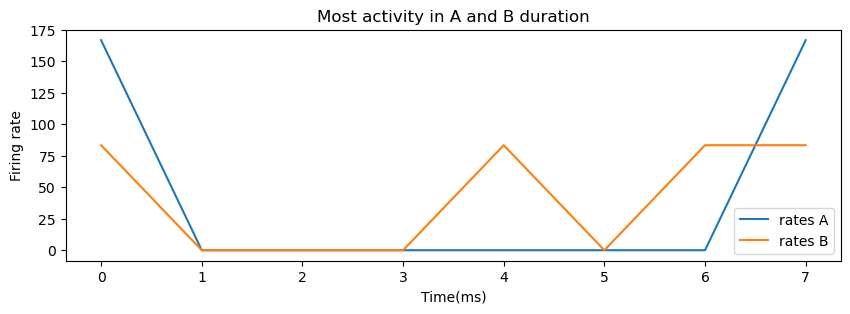

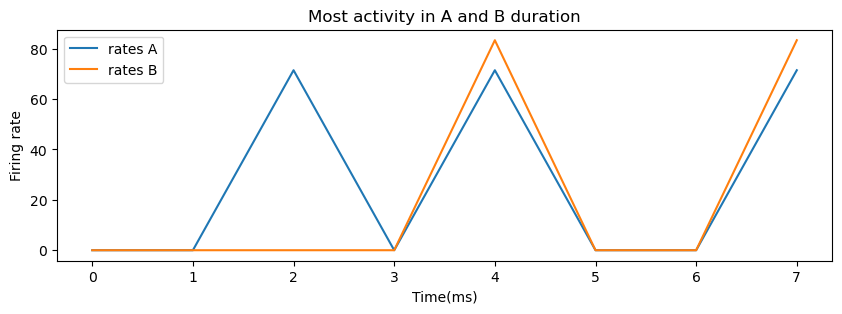

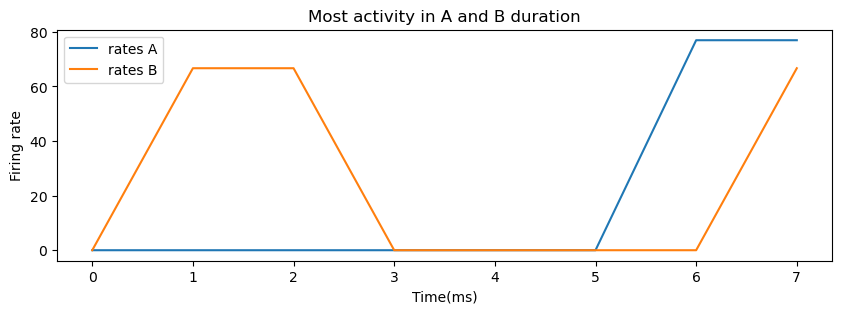

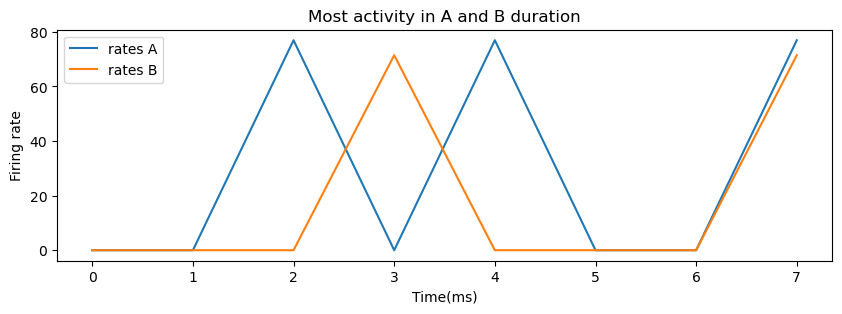

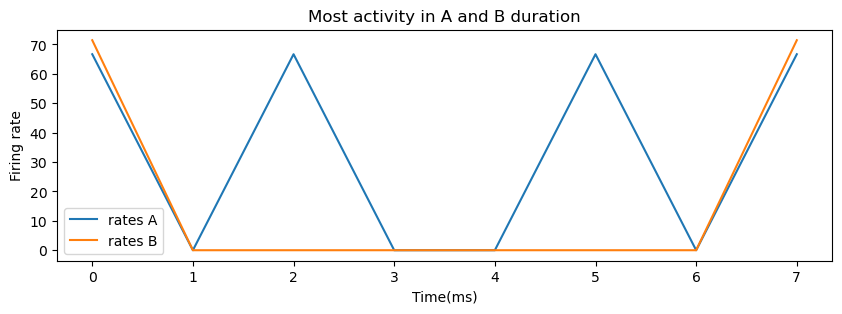

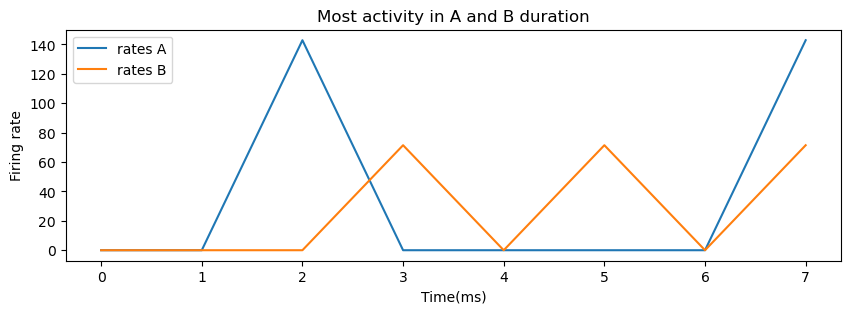

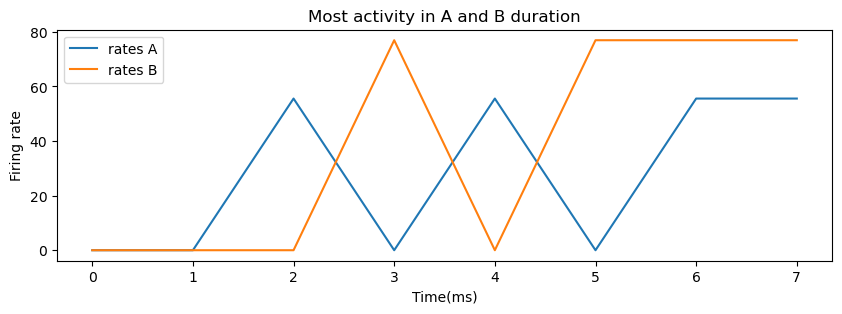

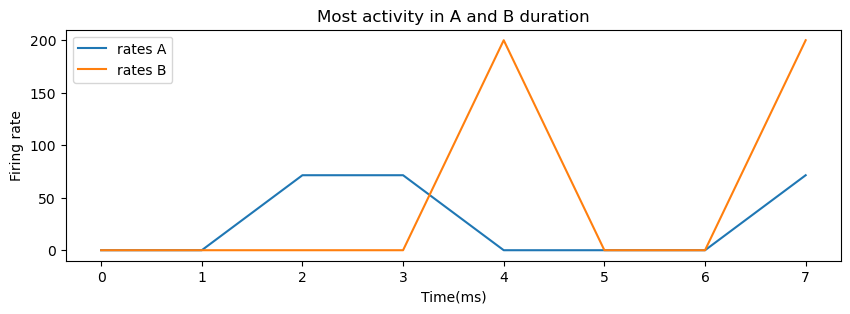

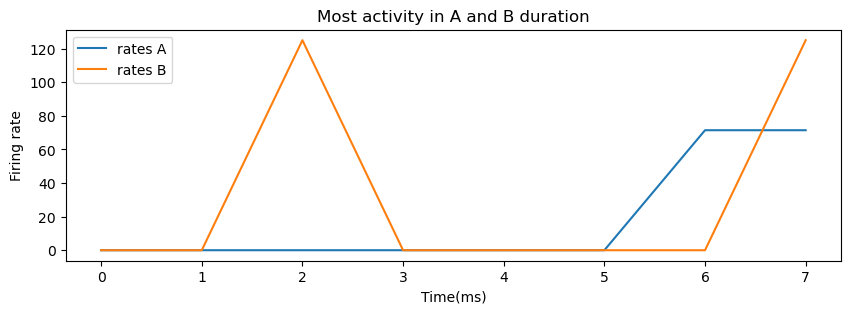

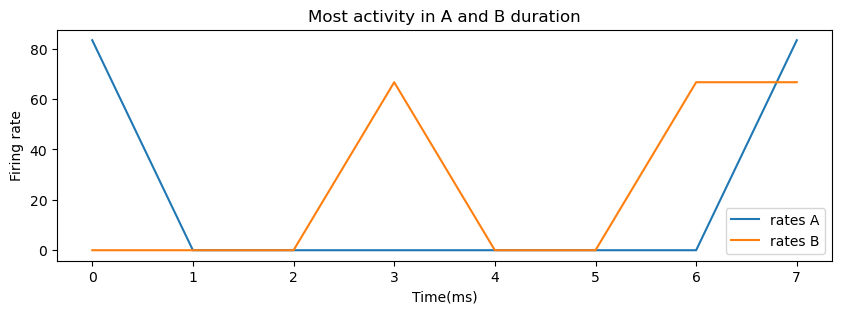

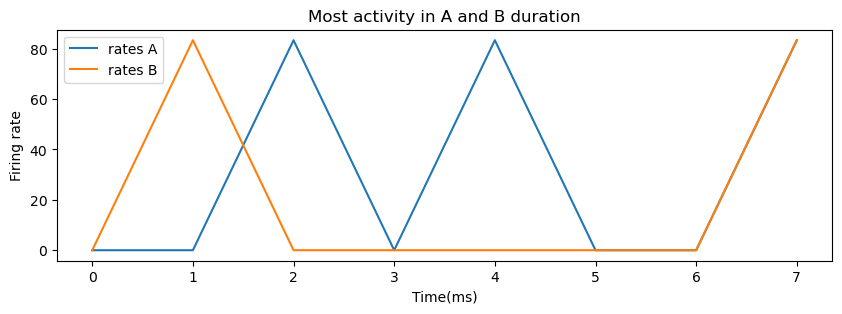

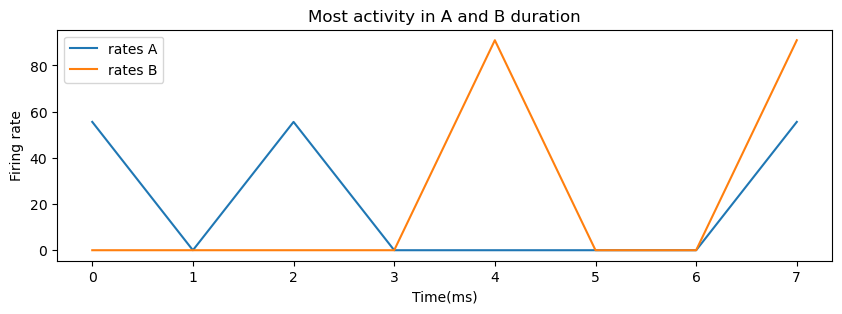

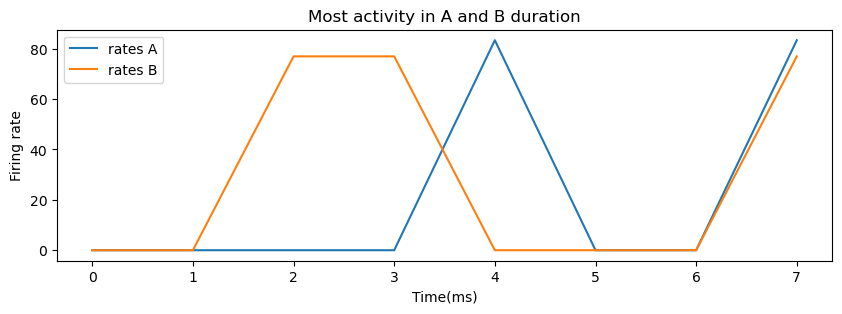

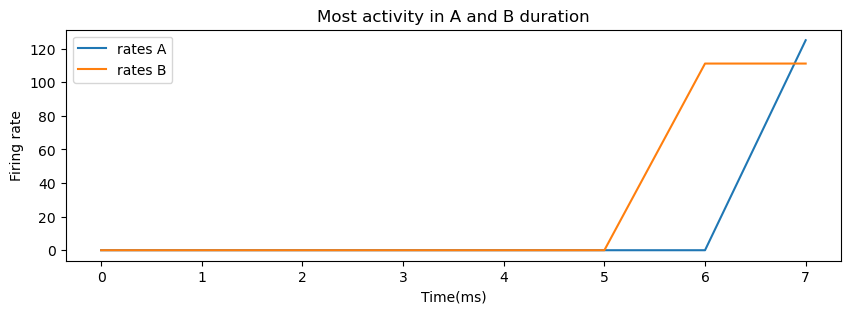

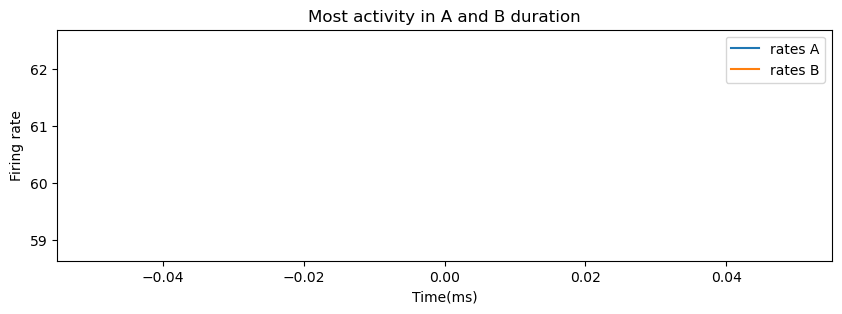

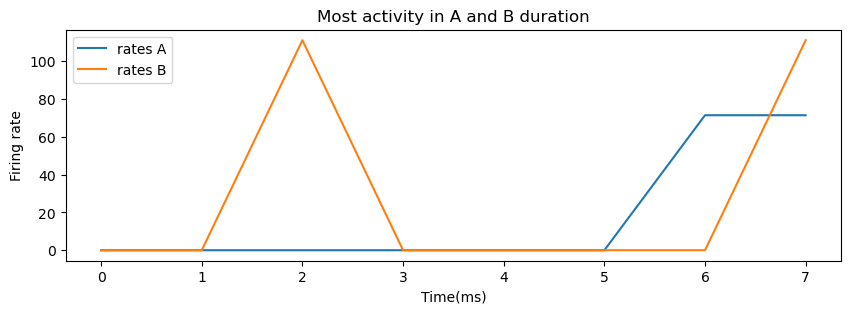

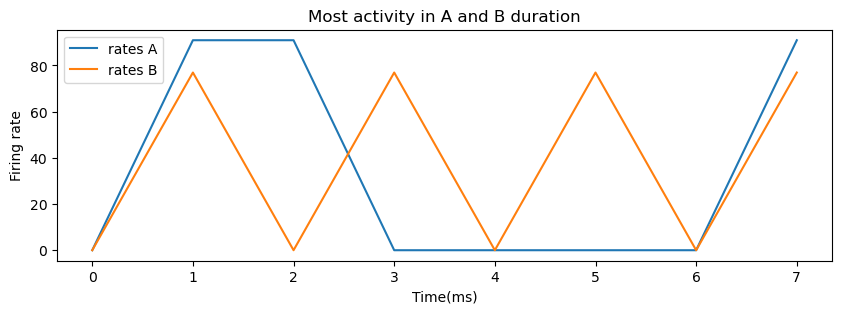

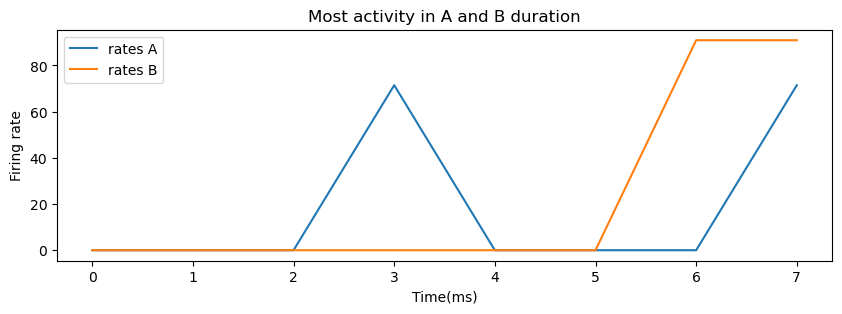

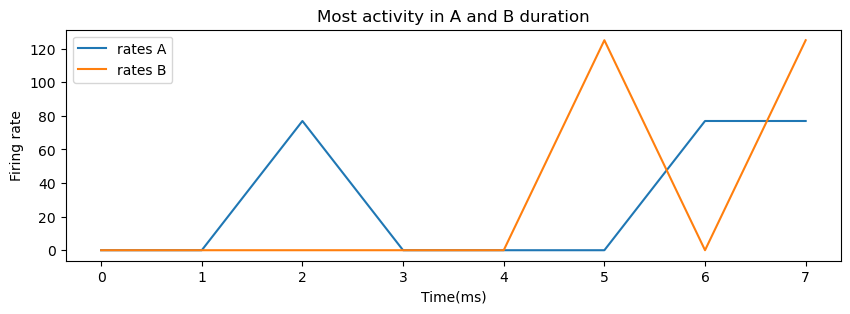

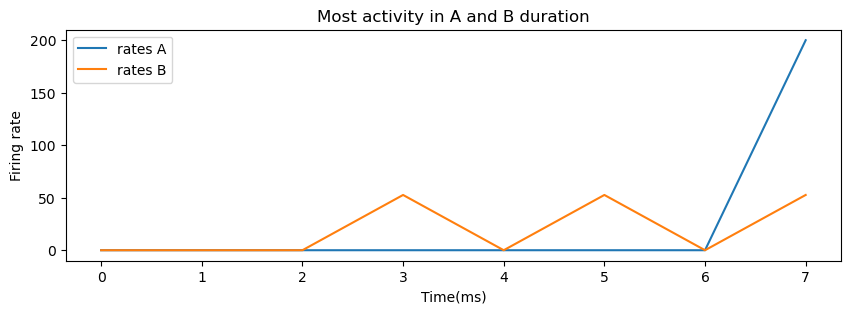

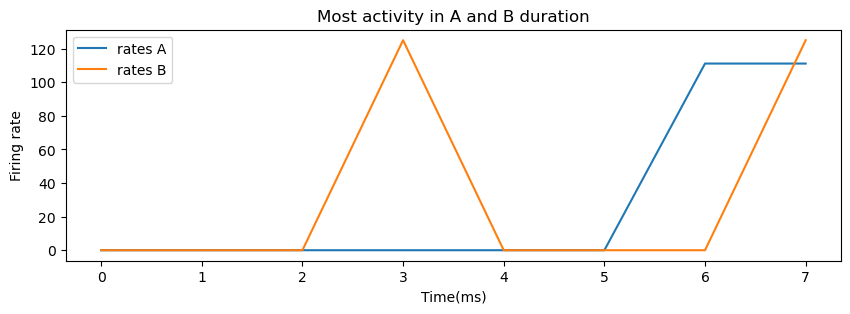

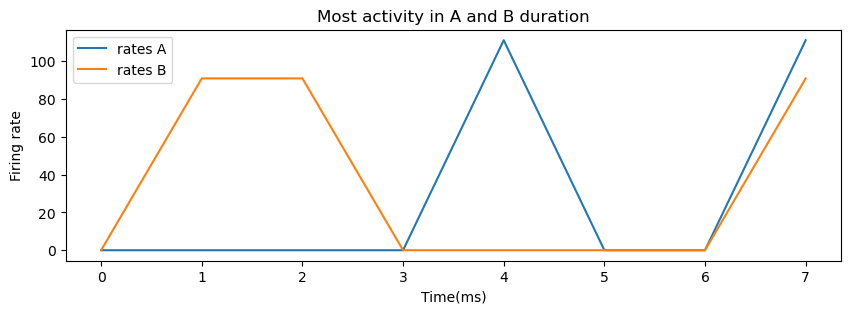

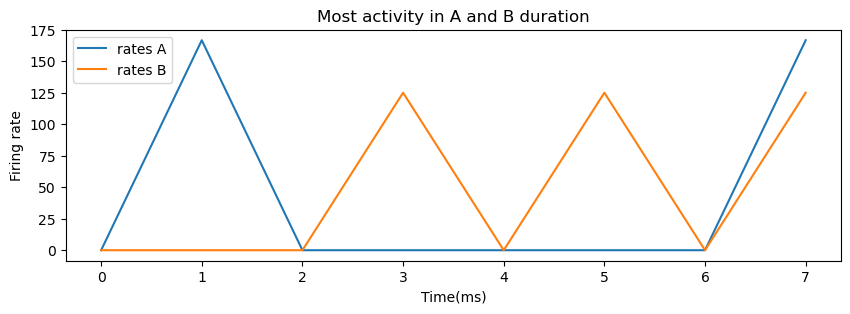

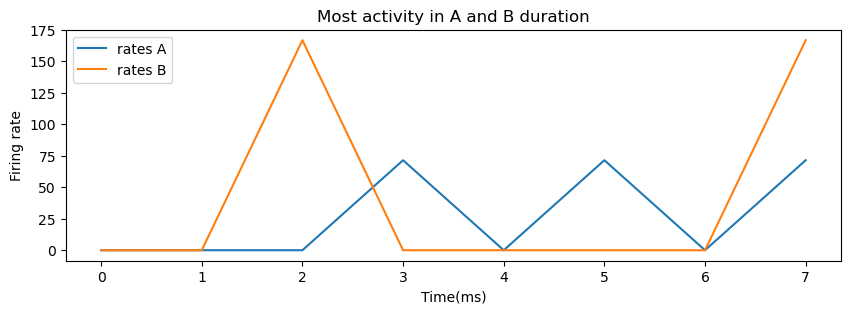

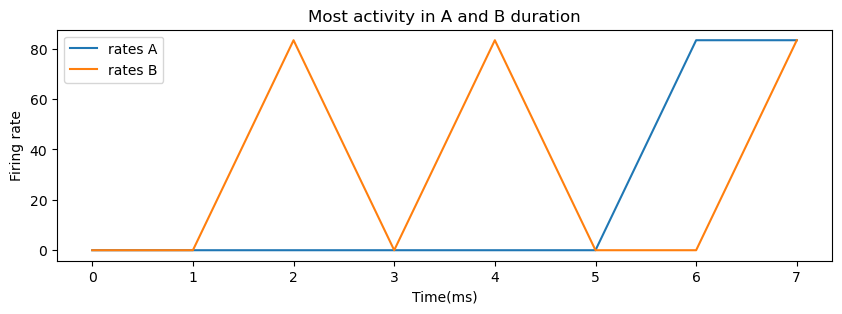

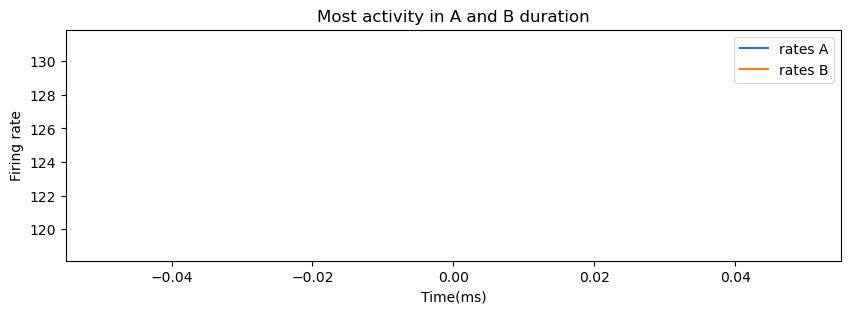

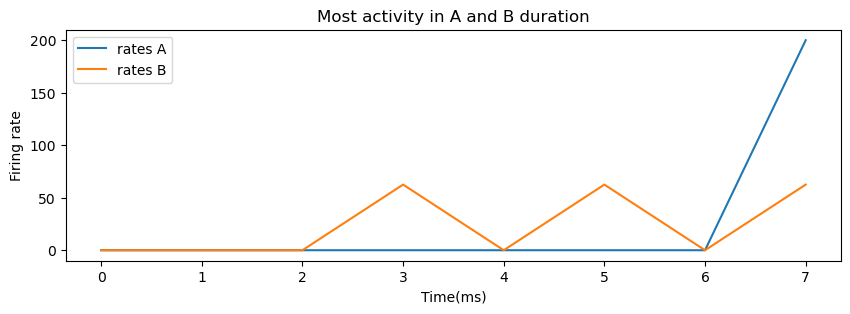

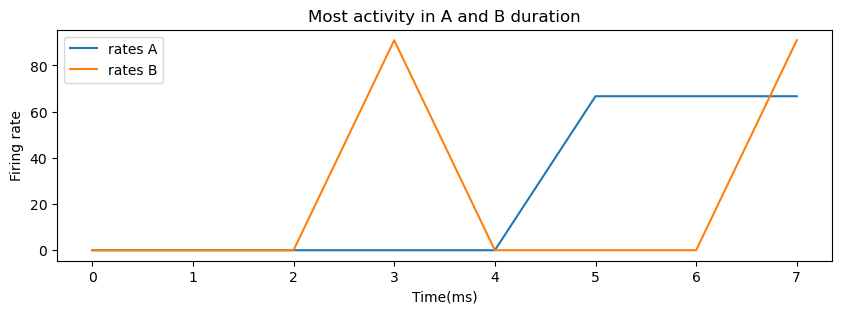

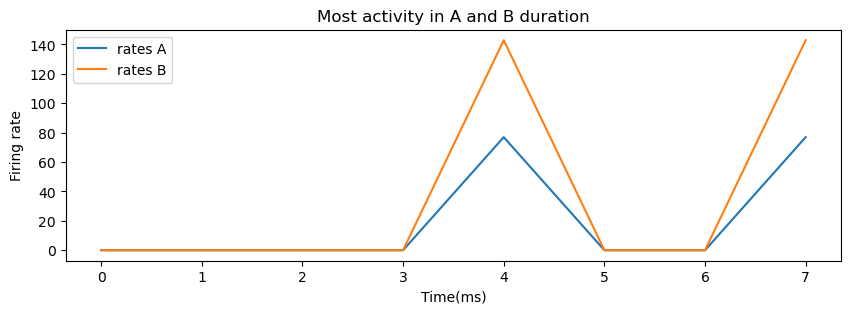

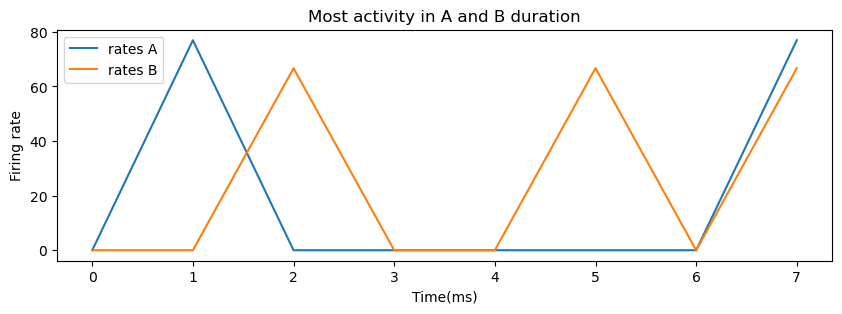

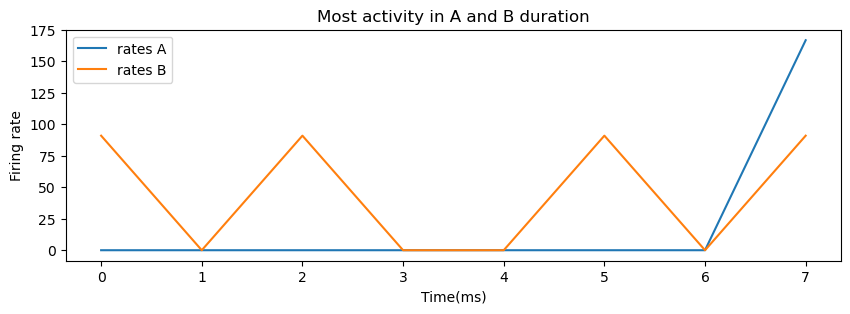

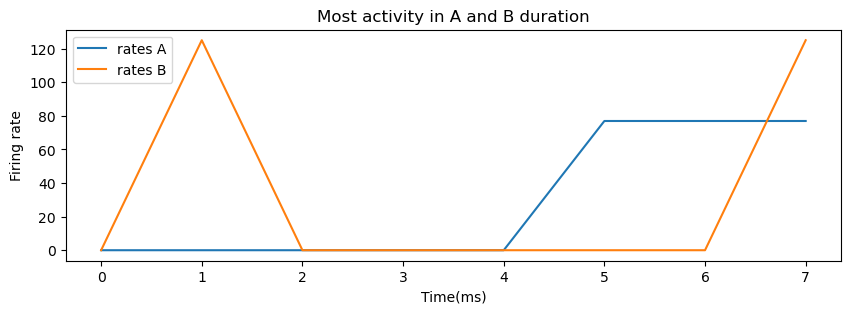

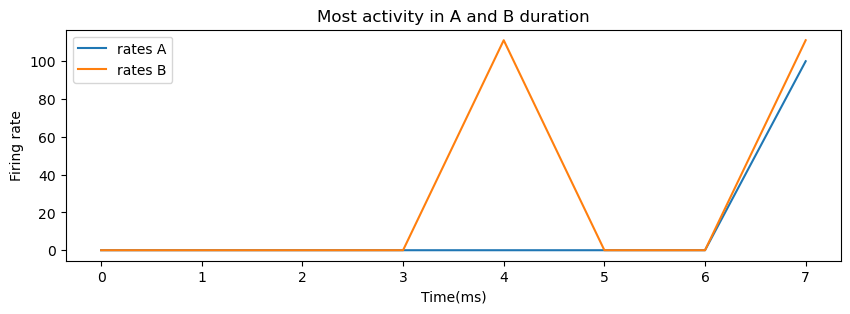

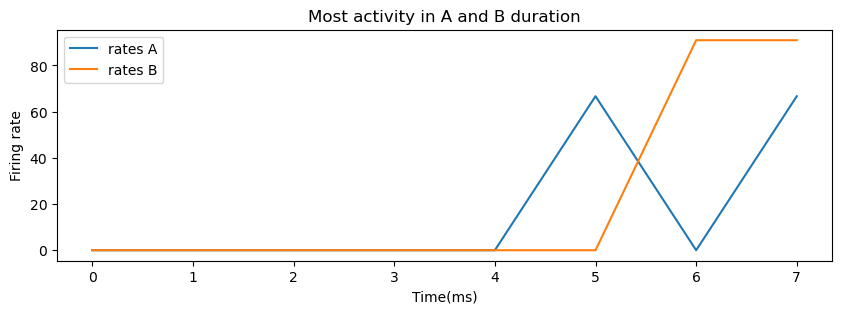

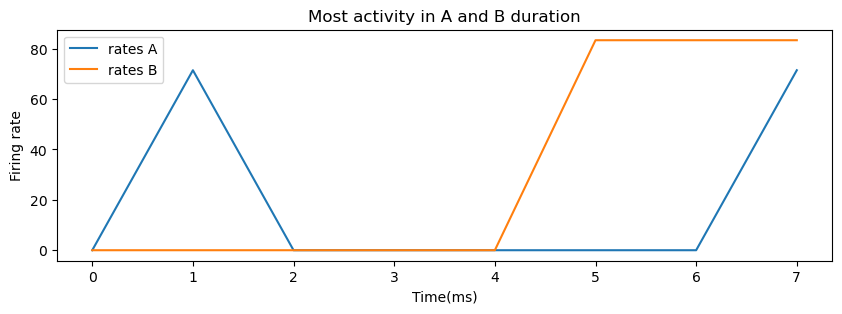

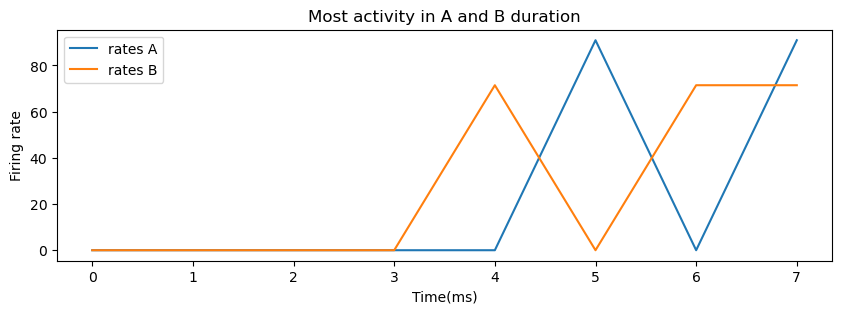

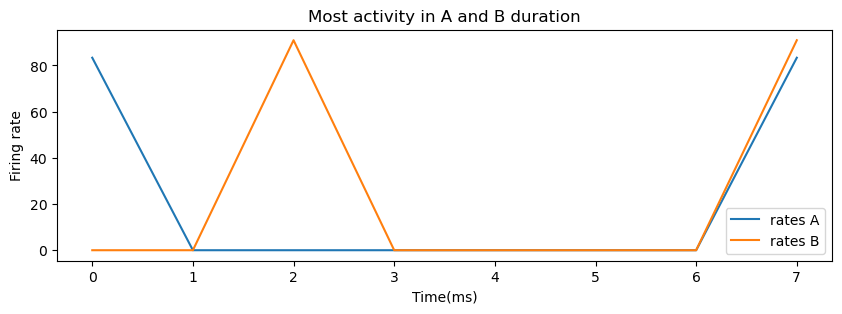

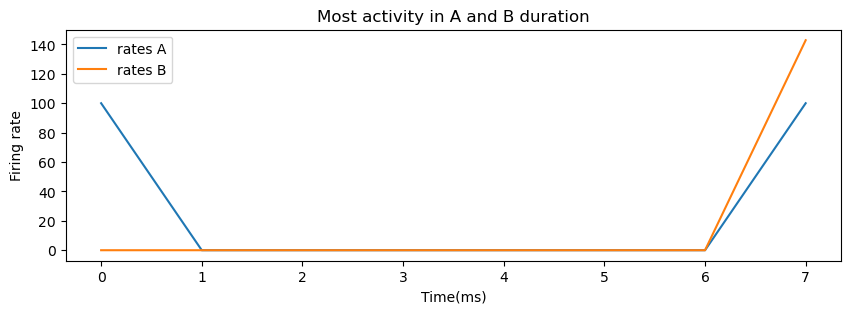

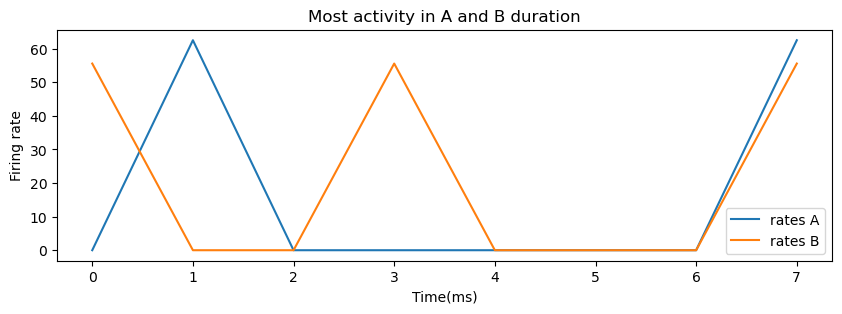

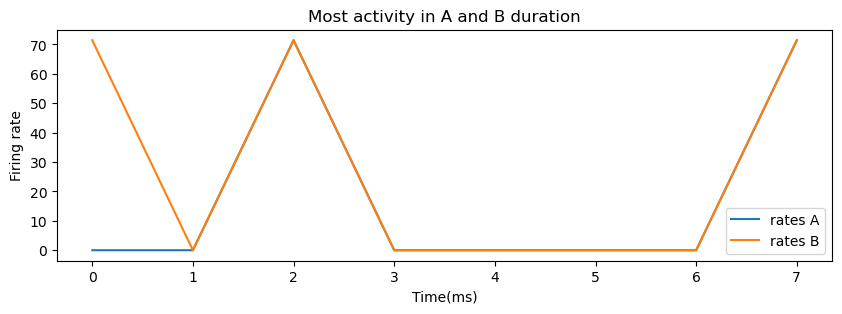

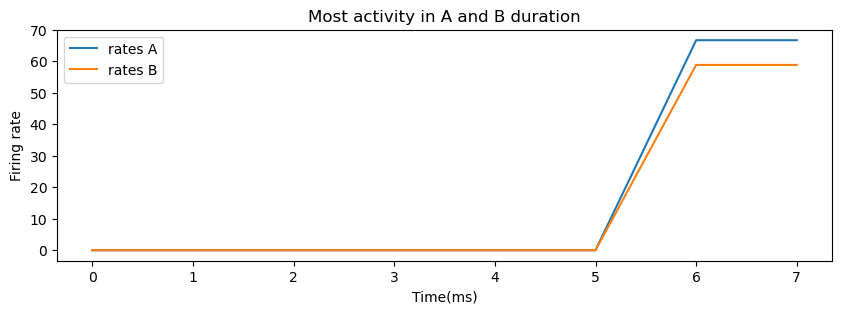

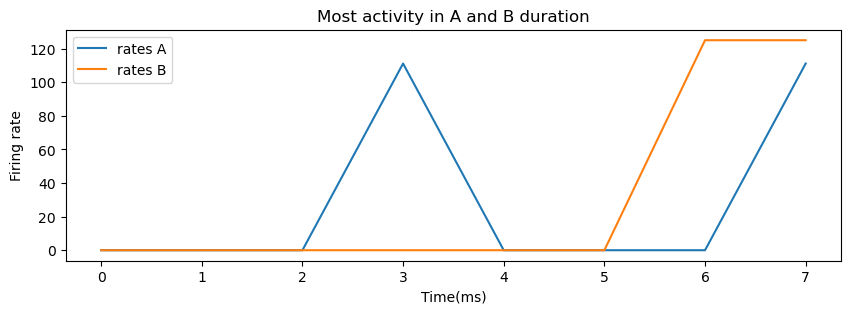

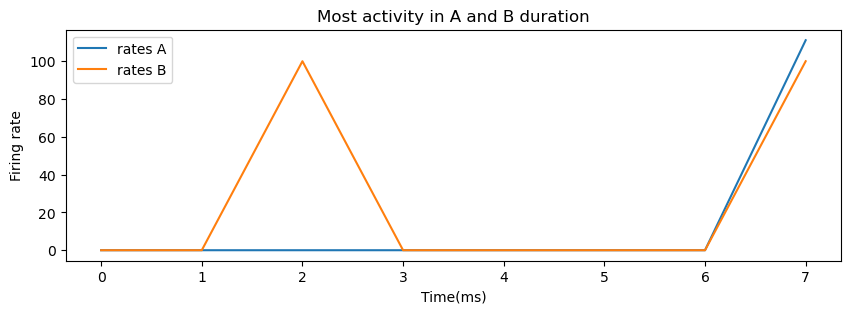

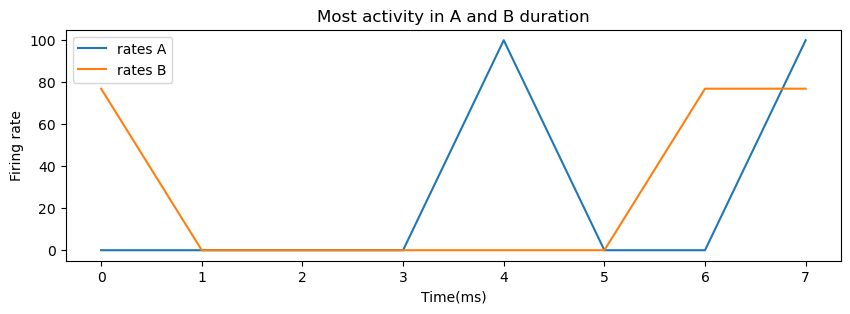

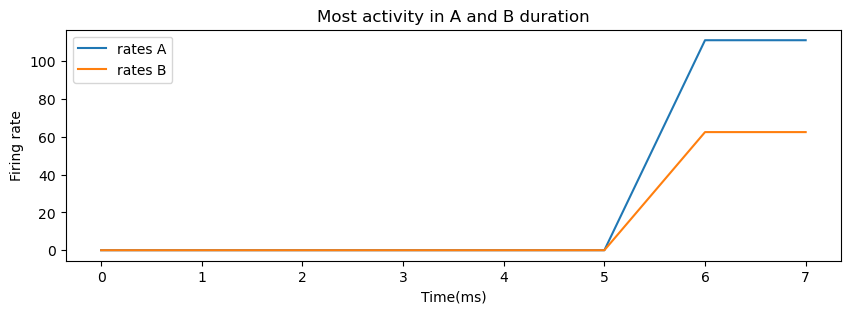

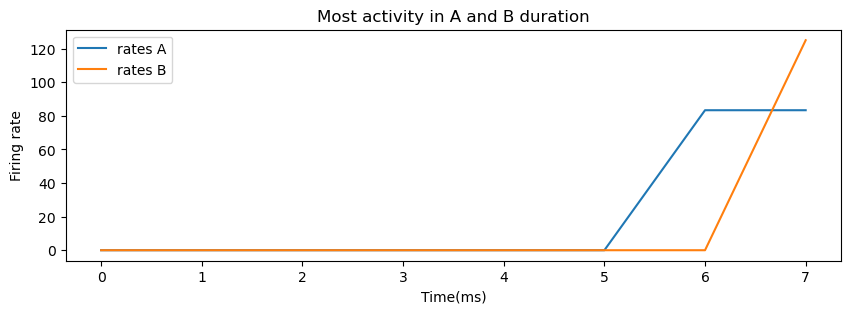

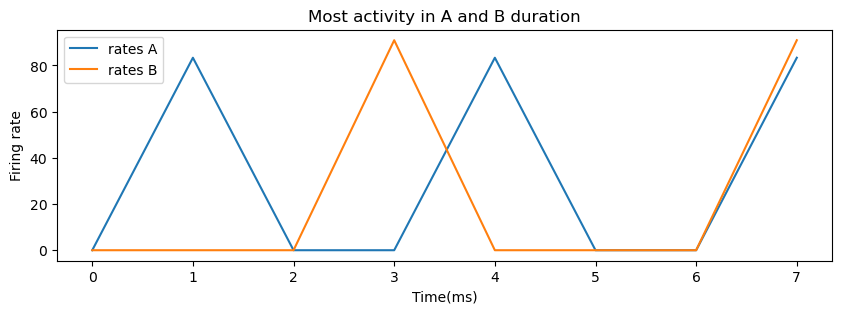

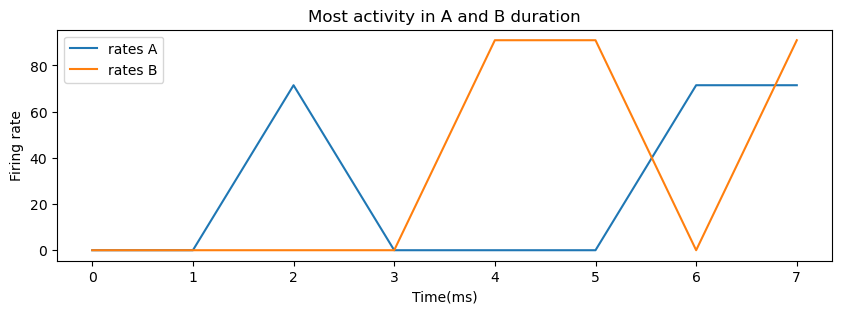

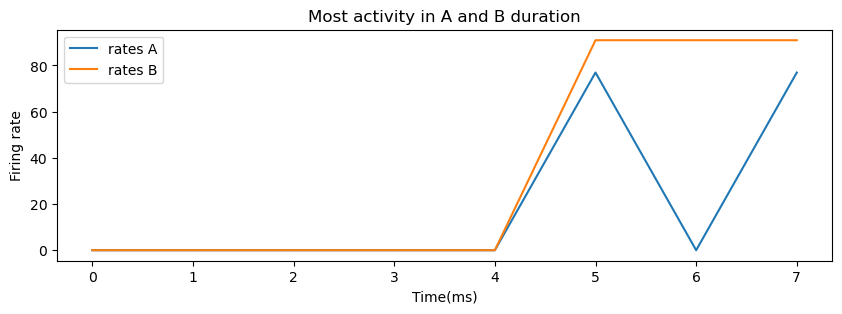

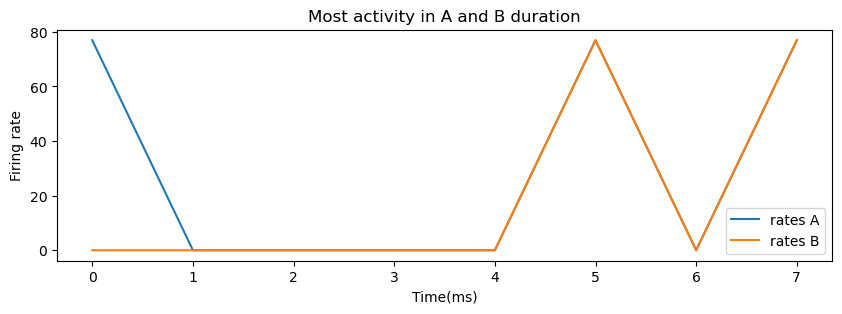

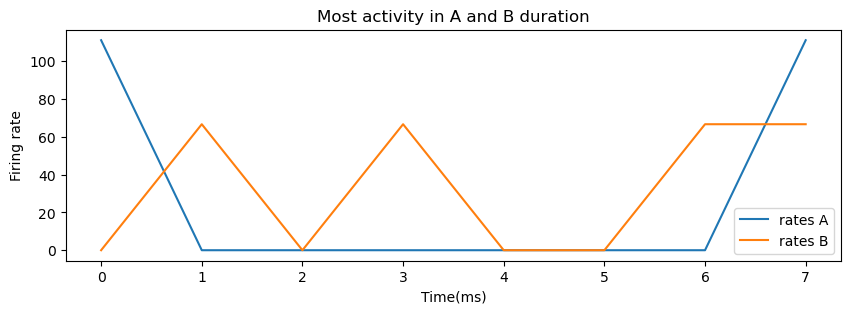

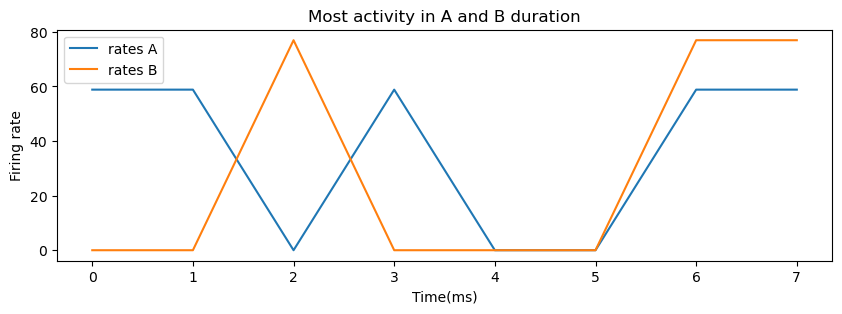

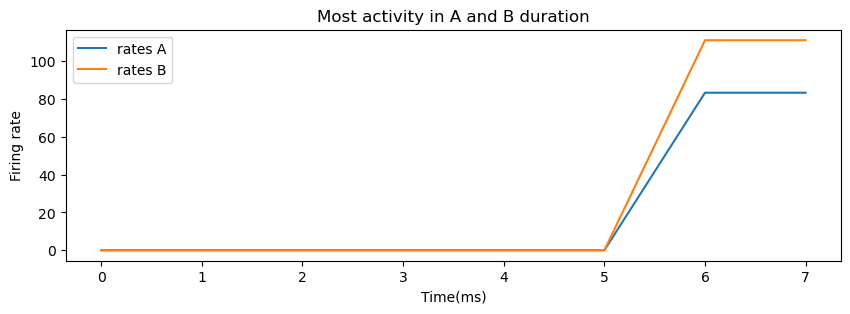

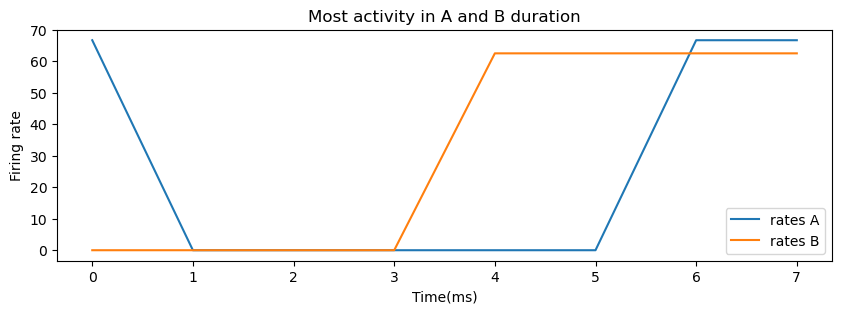

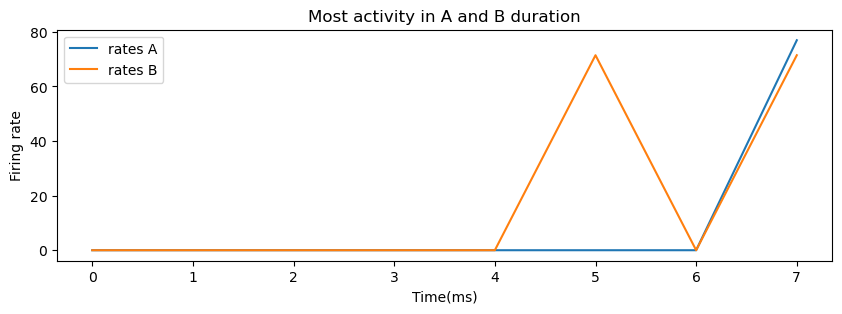

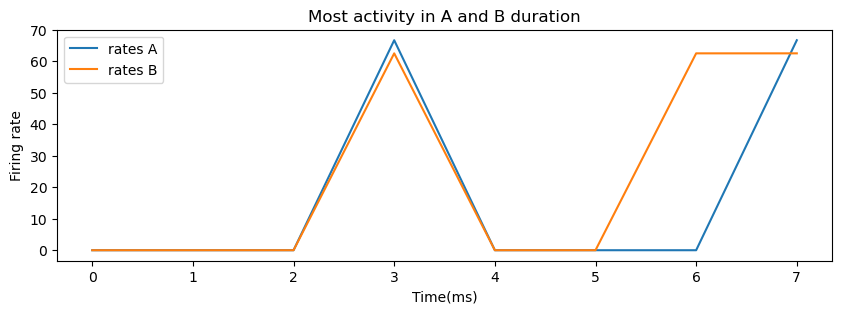

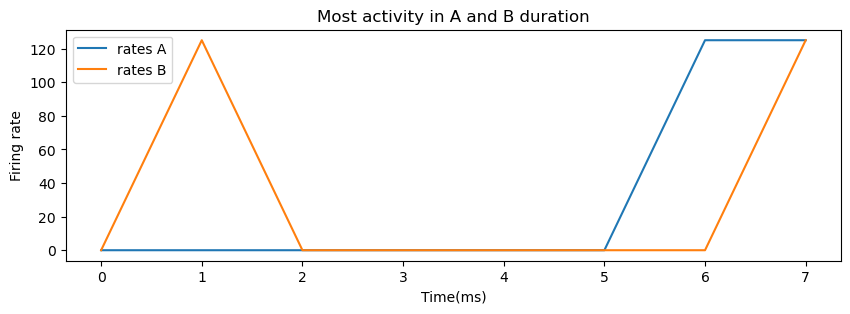

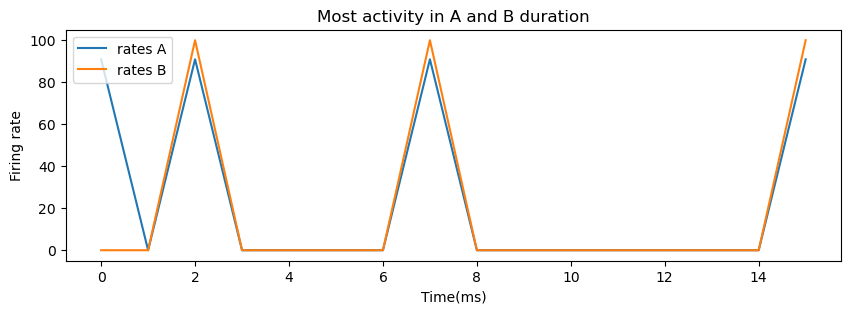

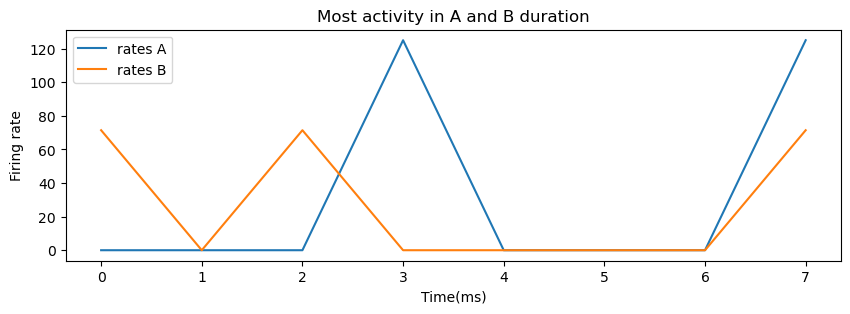

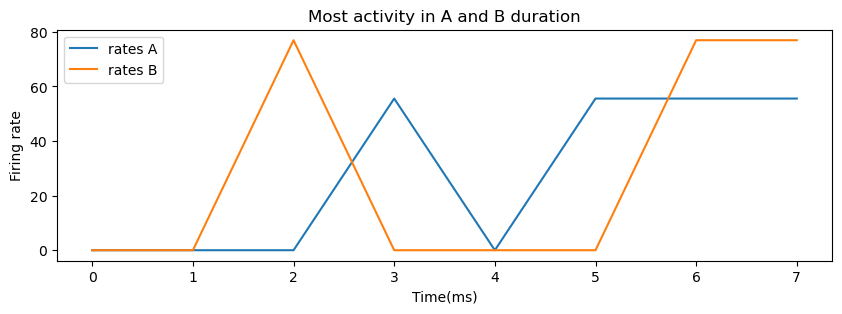

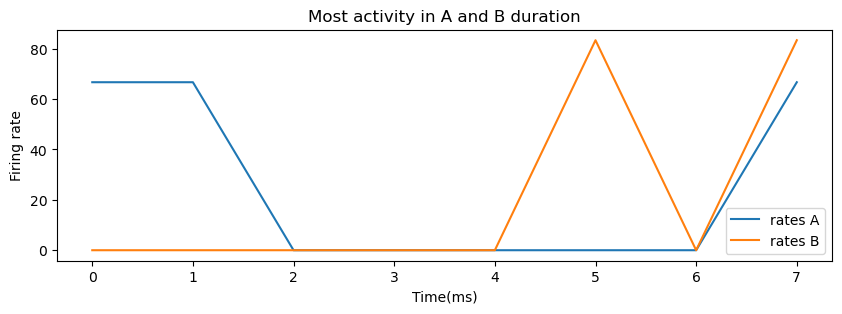

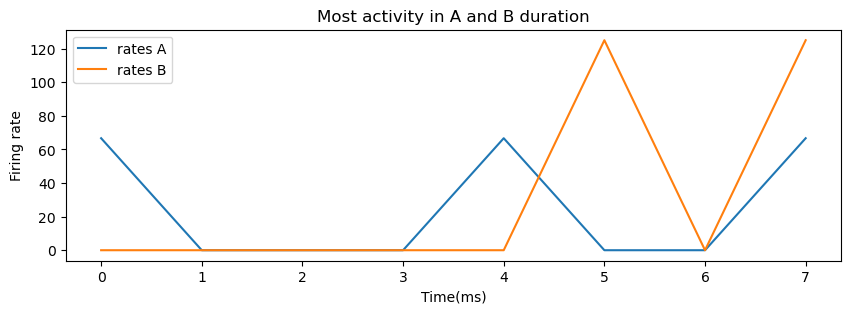

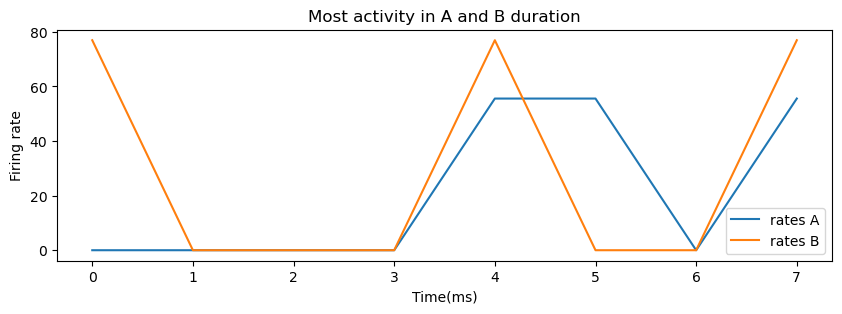

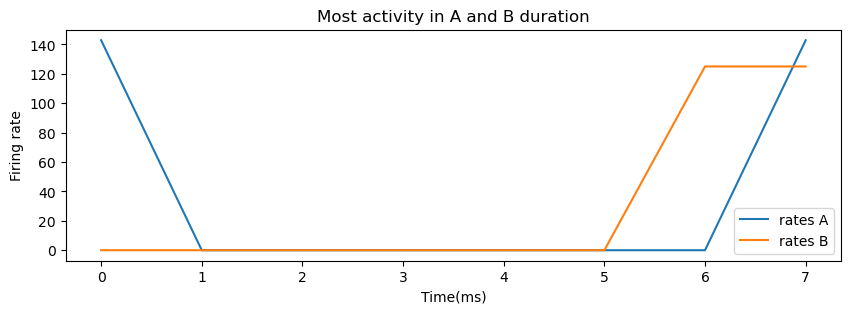

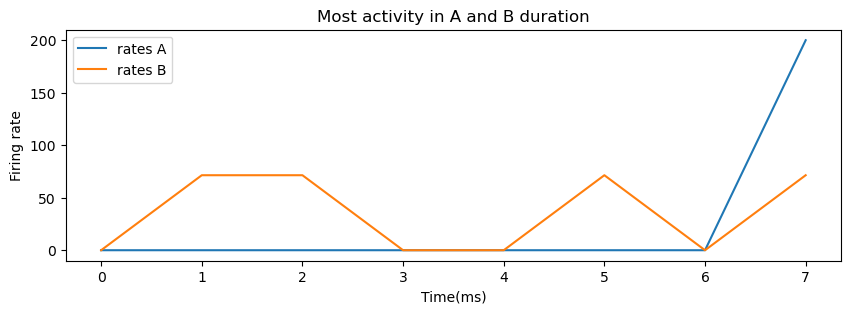

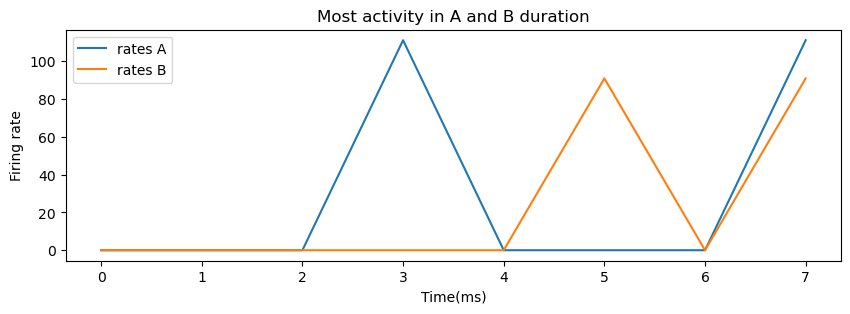

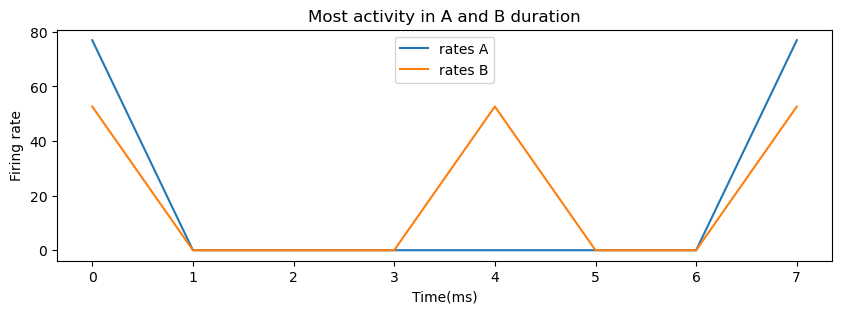

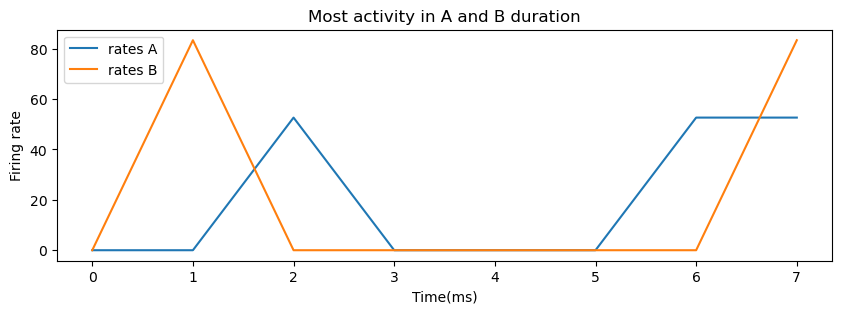

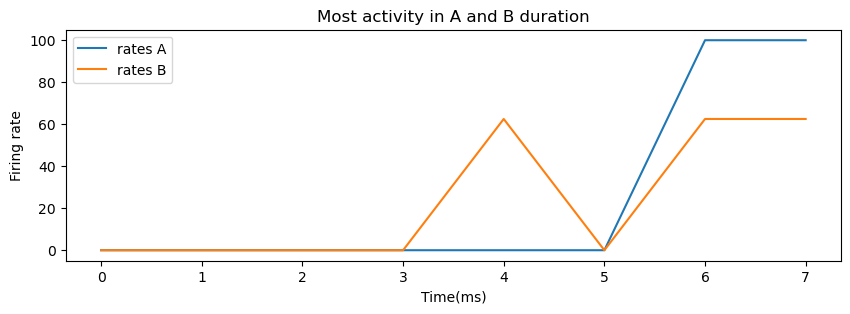

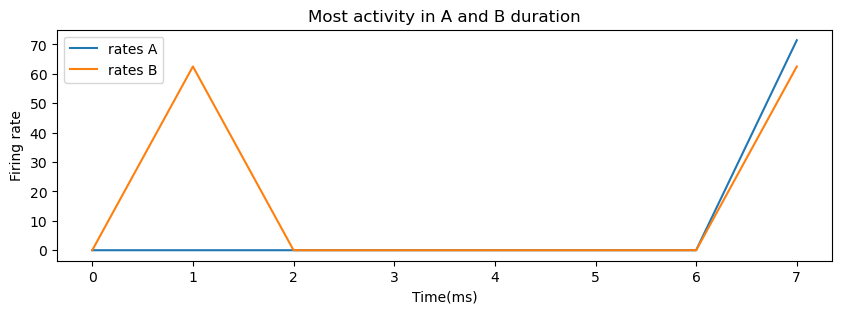

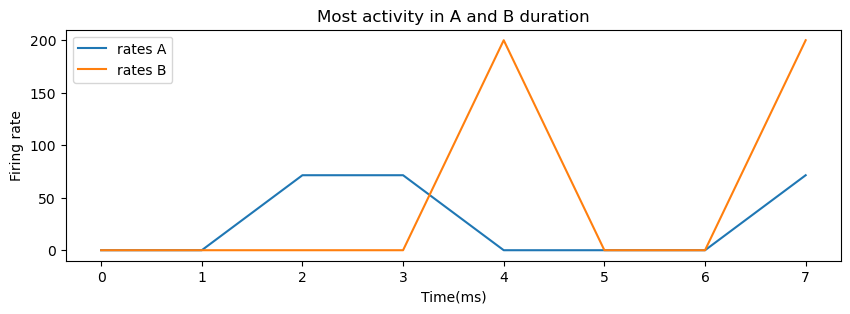

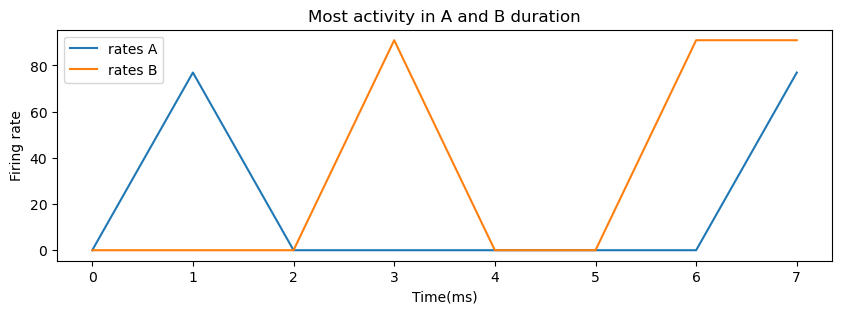

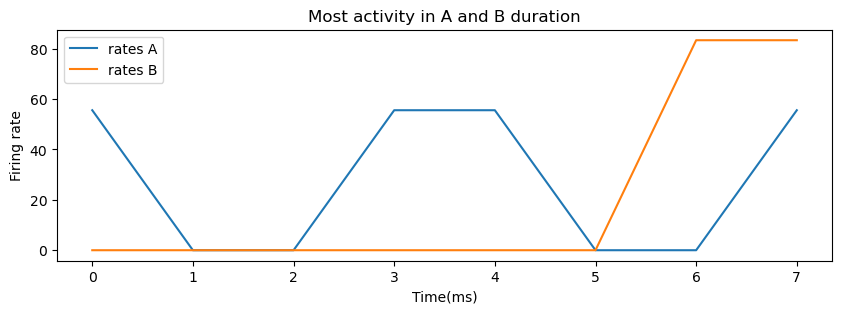

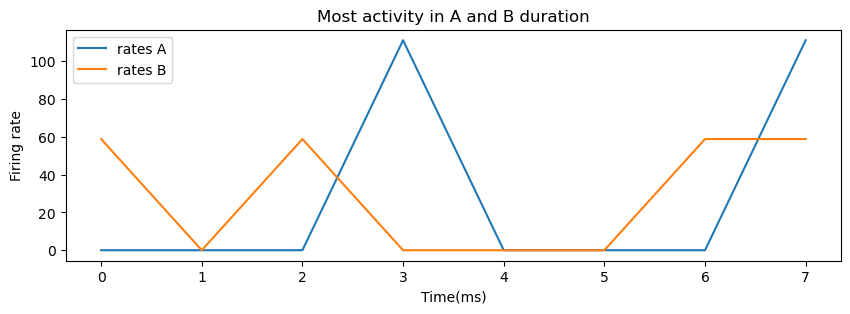

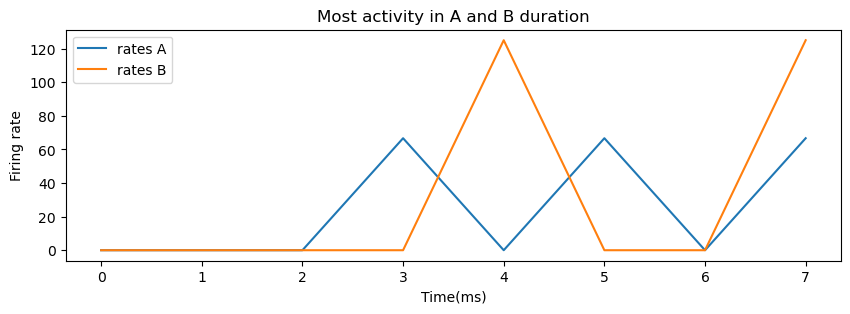

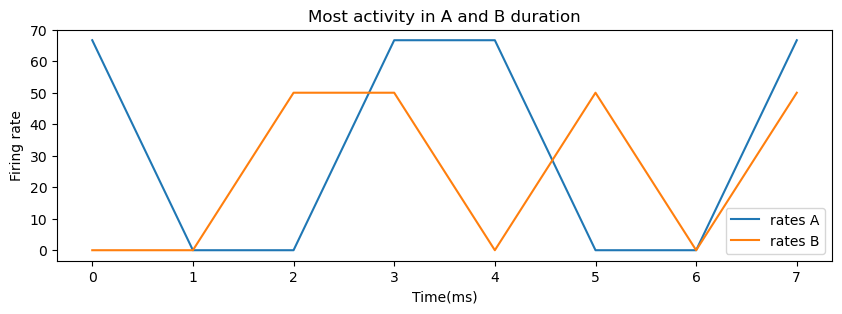

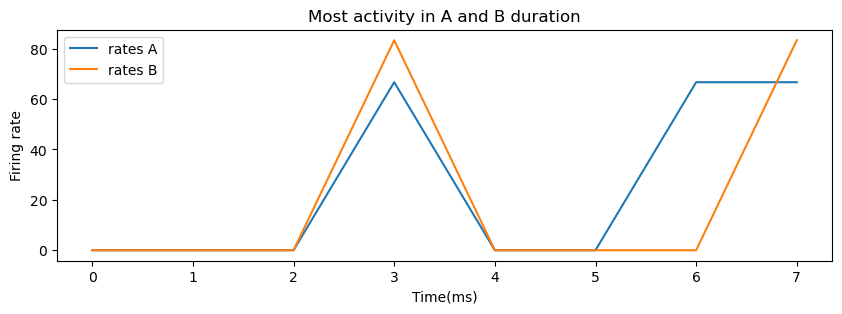

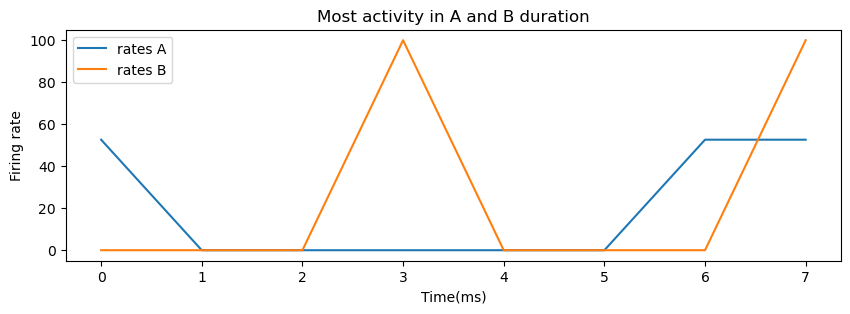

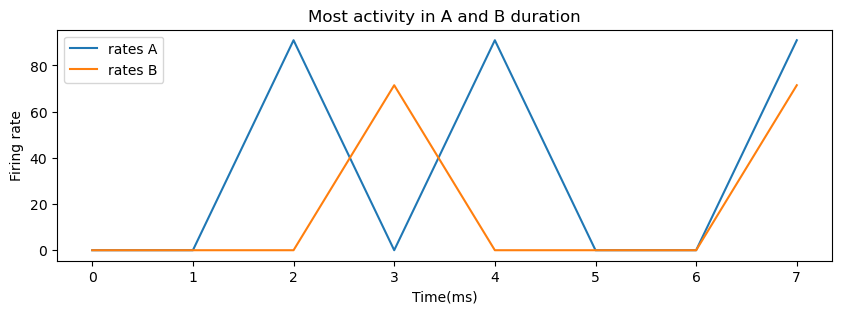

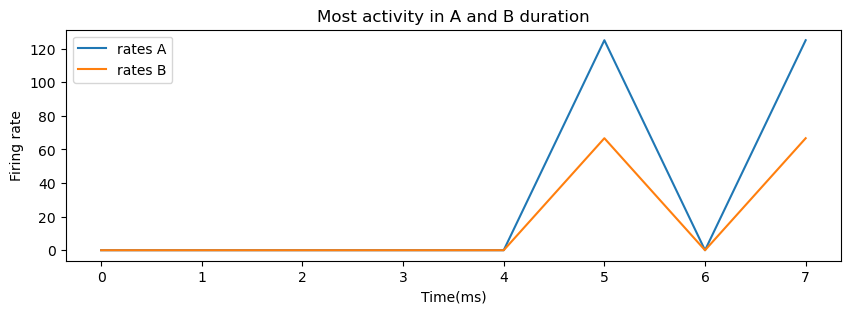

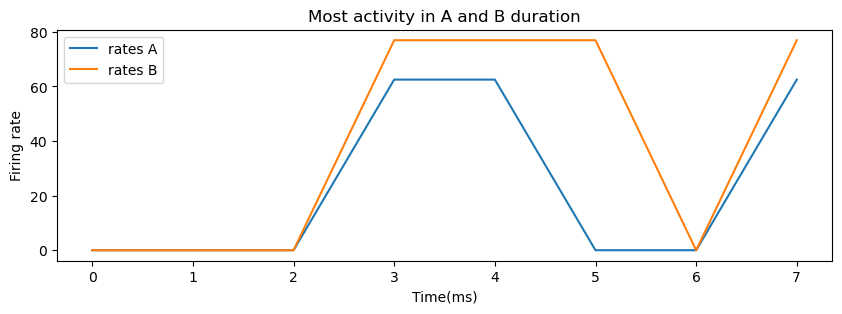

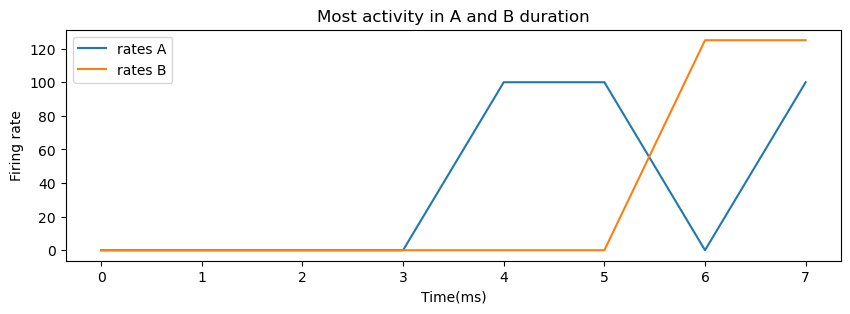

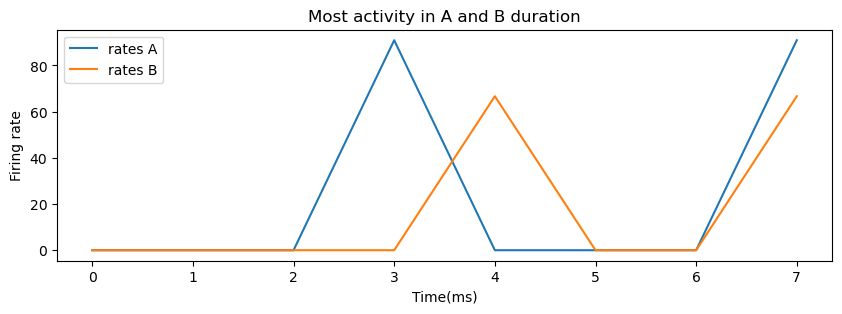

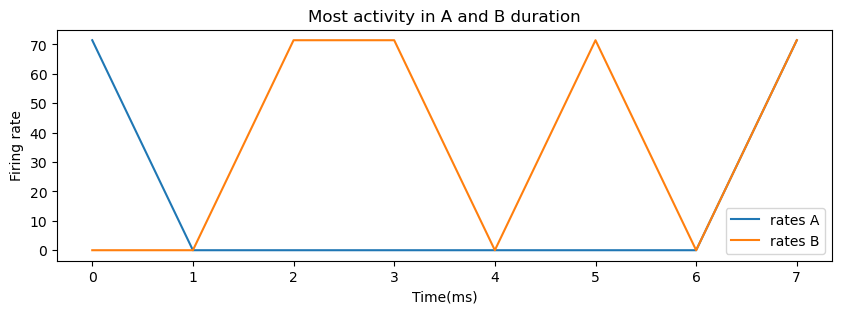

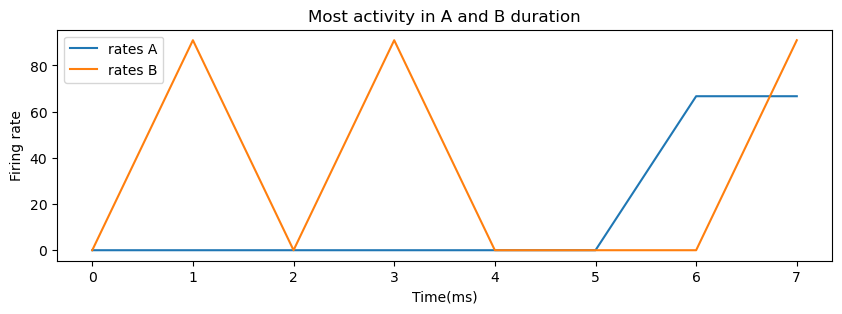

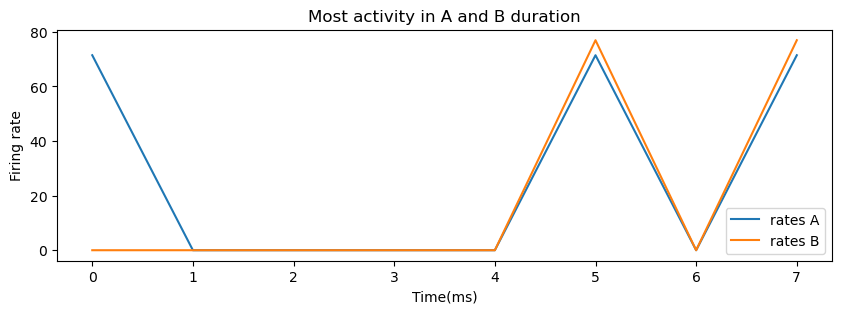

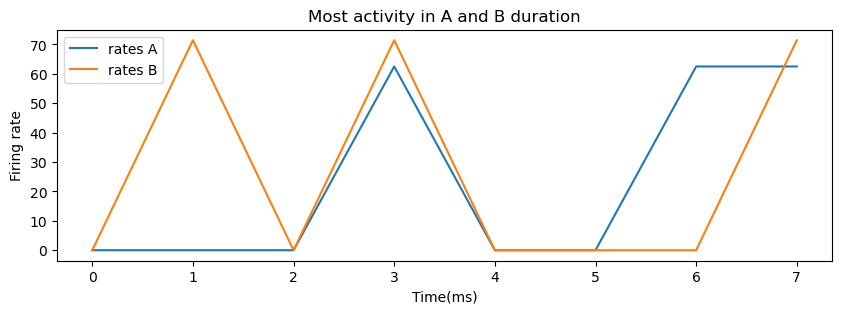

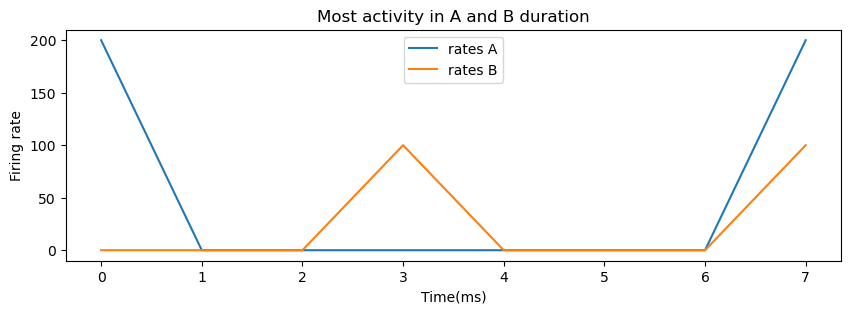

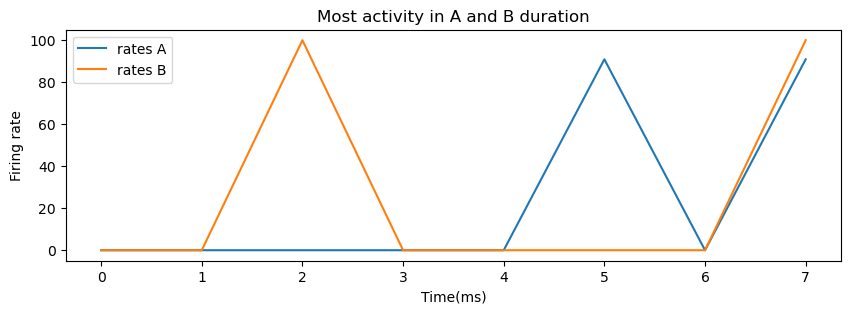

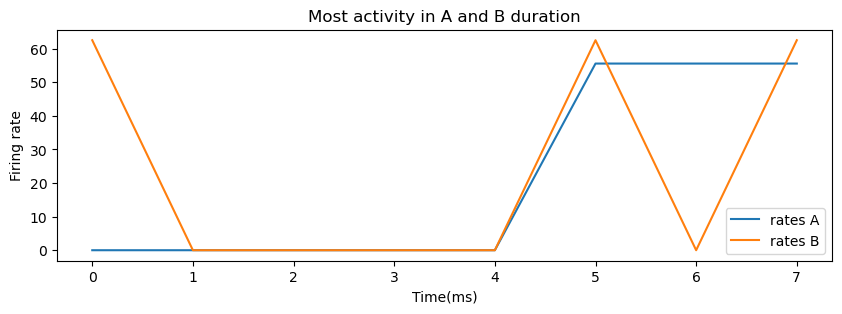

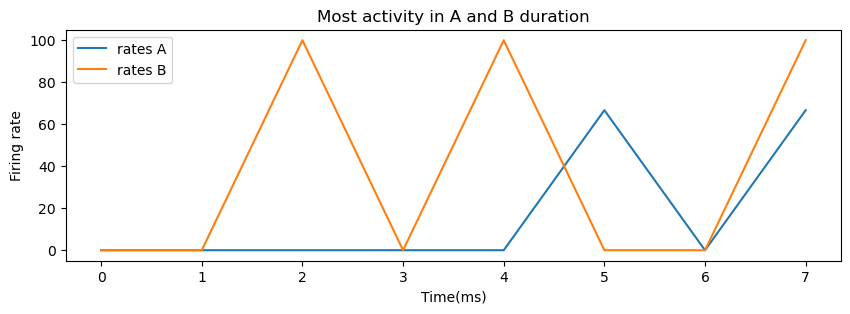

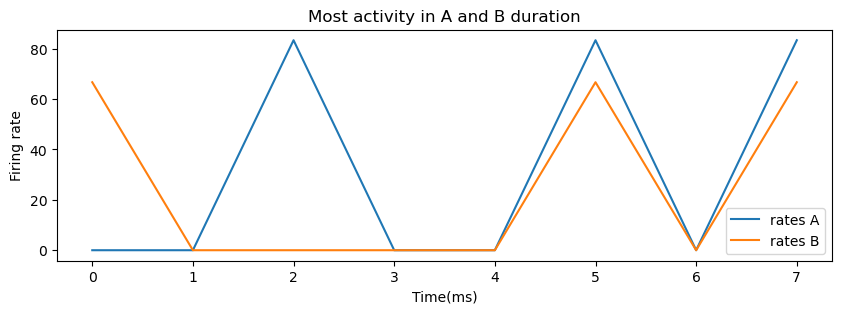

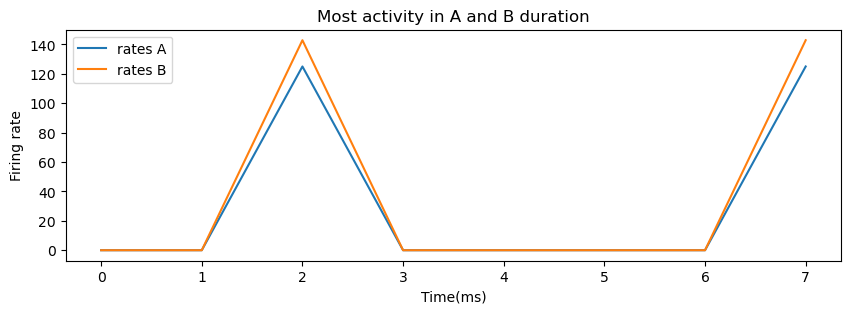

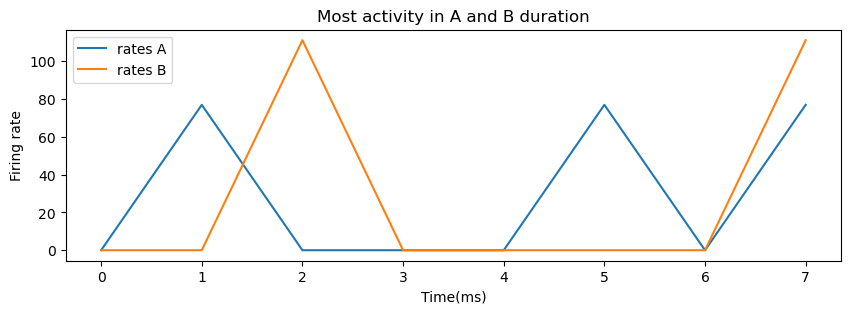

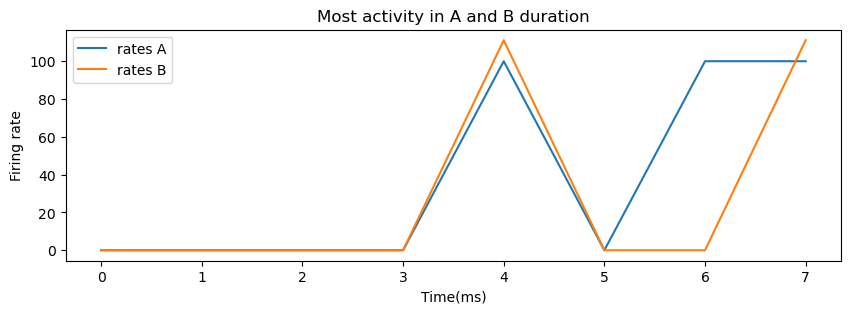

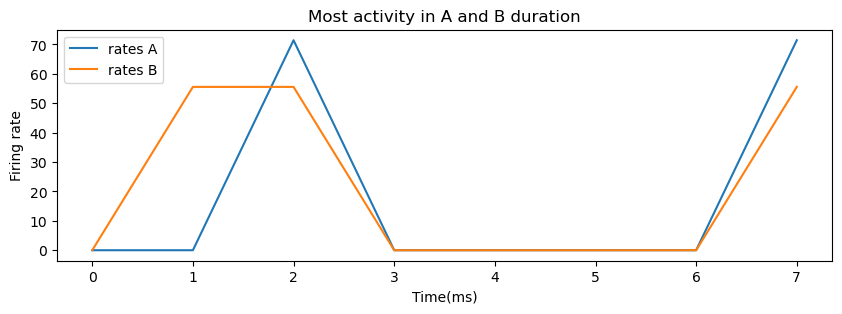

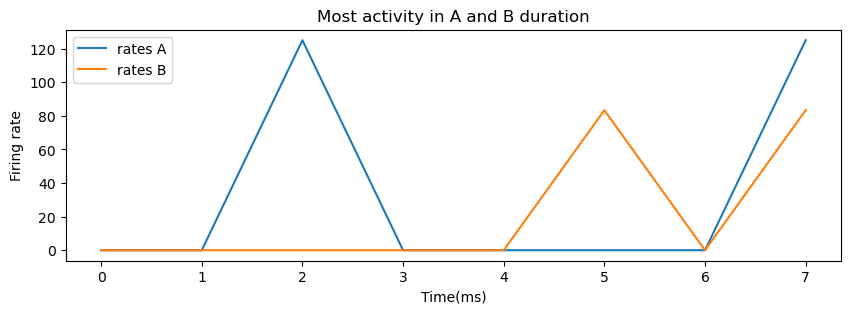

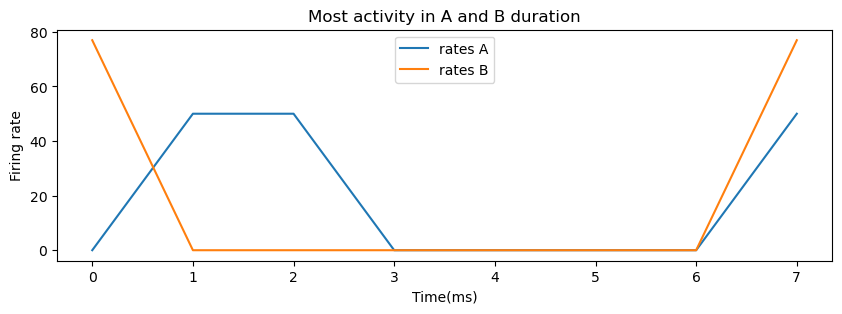

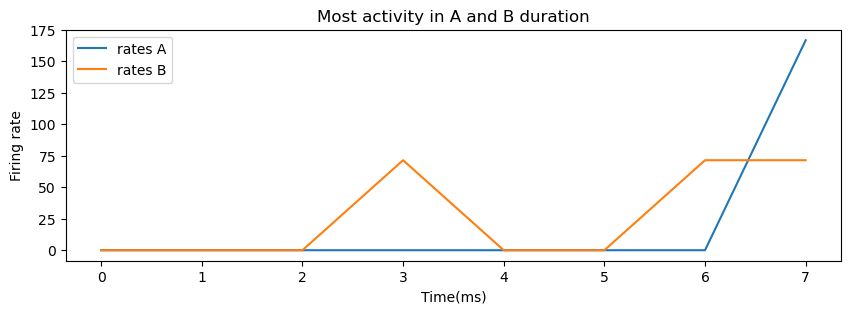

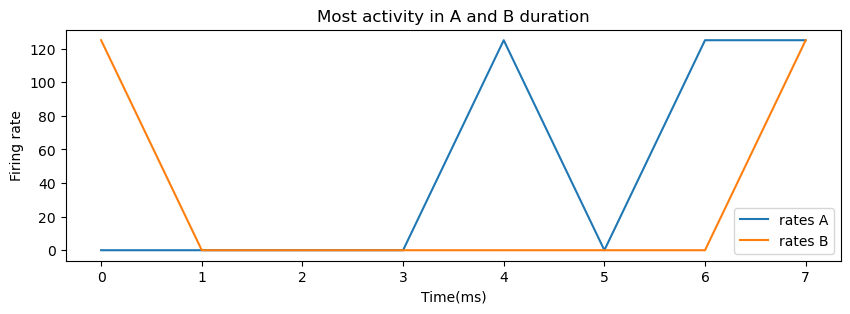

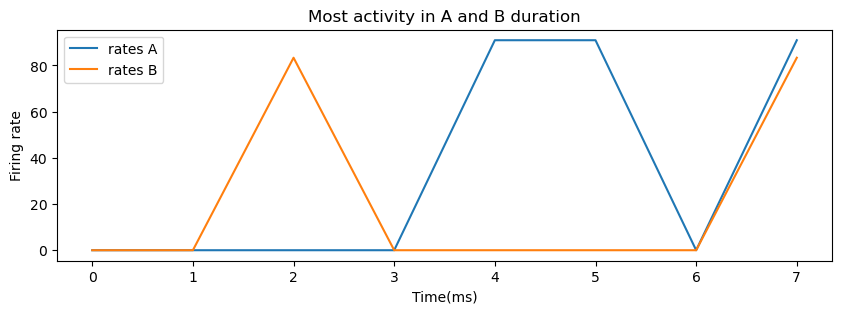

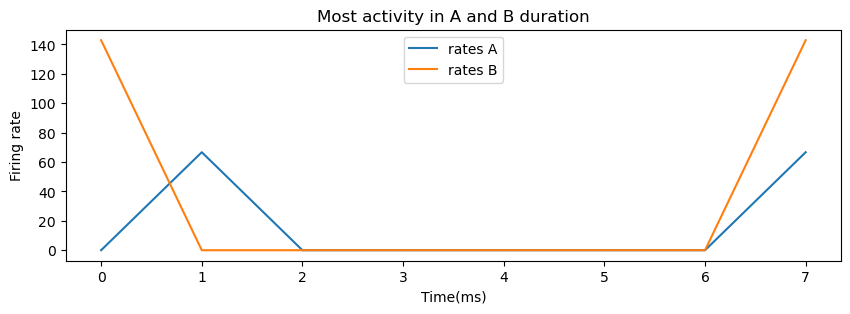

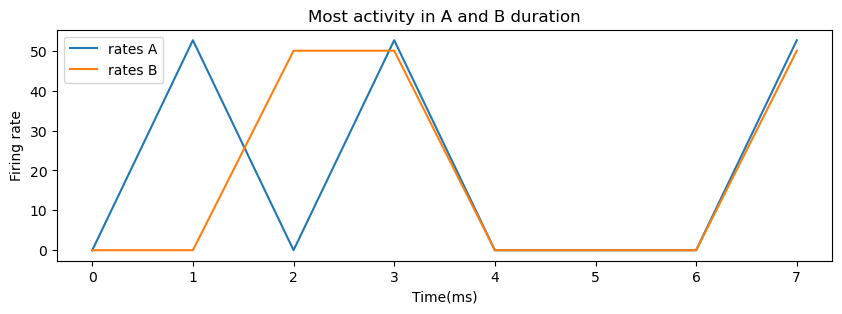

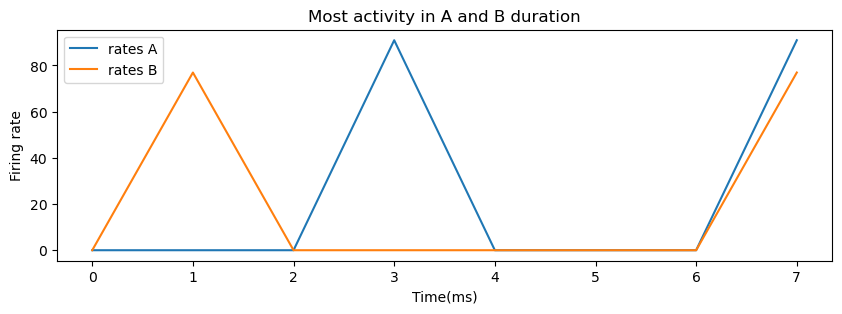

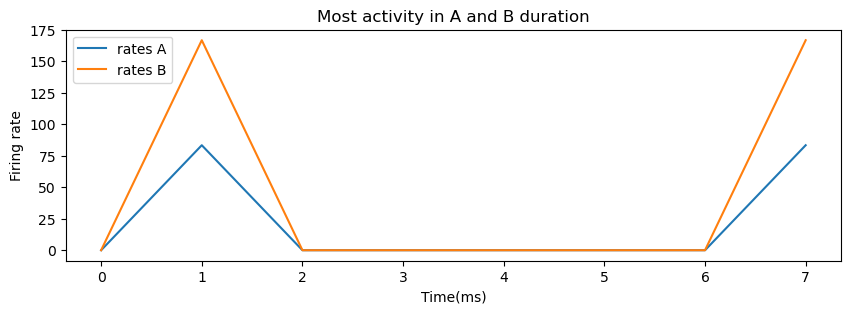

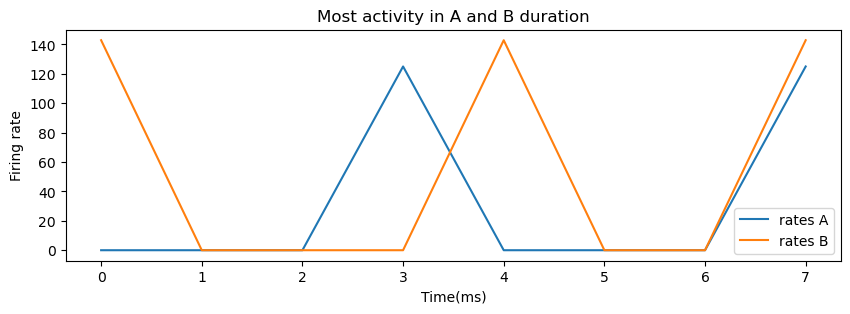

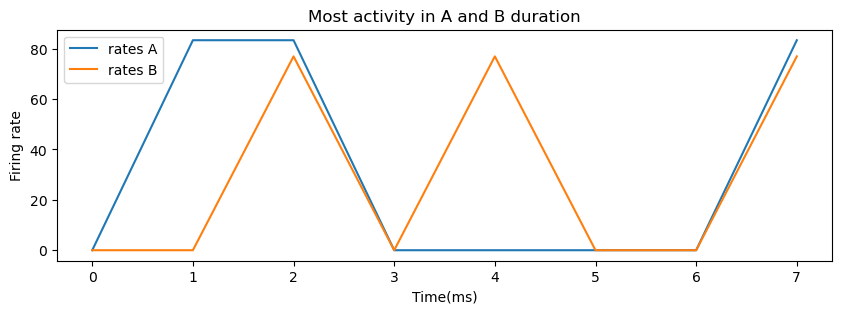

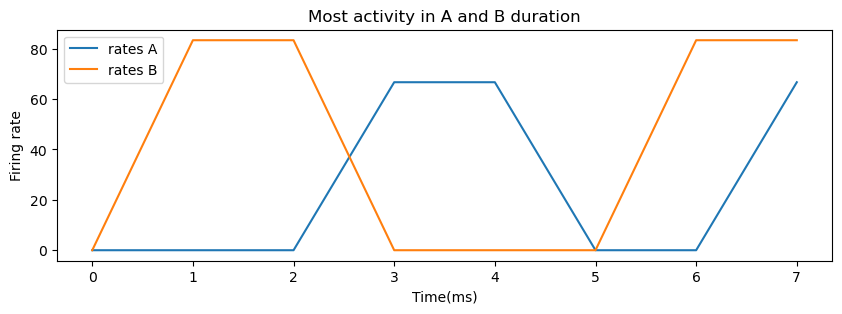

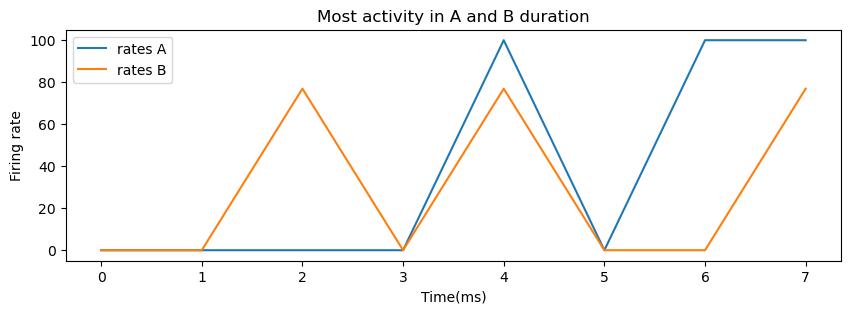

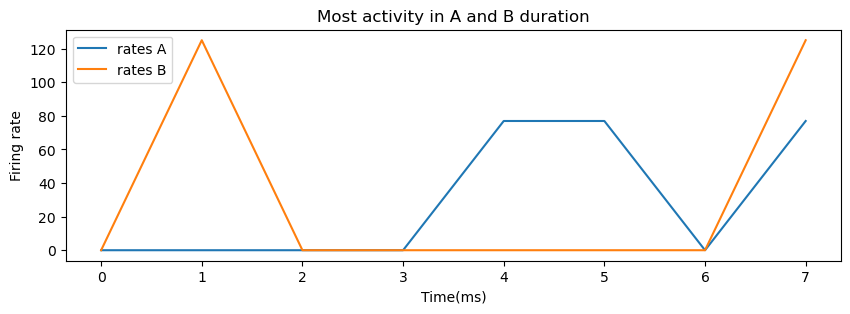

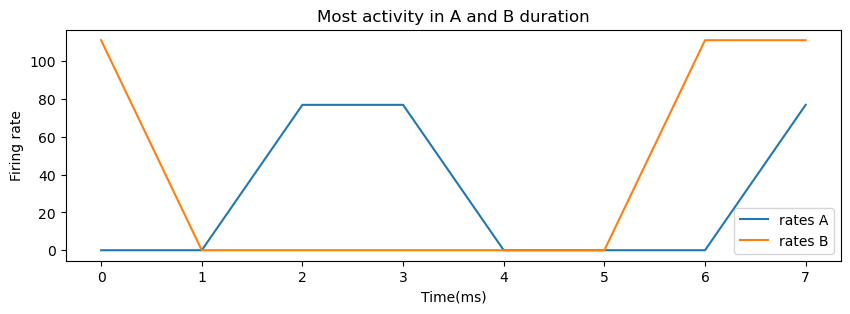

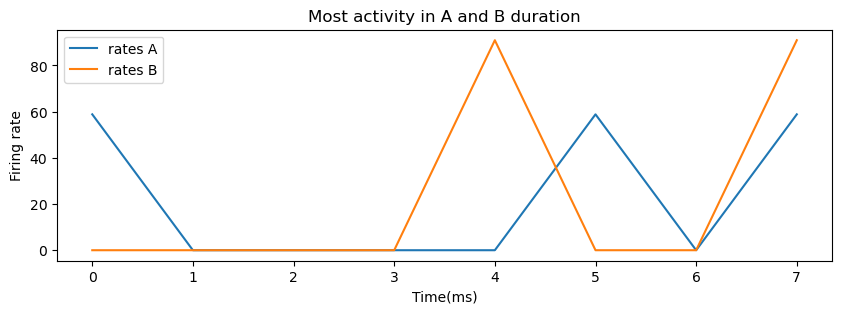

In [38]:
# calculate the measurement that I define 

A_2_B_measures = []
for i,s in enumerate(stimOnsets):
    (max_val_A, start_duration_act_A, rates_A) = find_max_fire(mat1[i,50:-1])
    (min_val_A, end_duration_act_A) = find_min_fire(mat1[i,50+start_duration_act_A:-1], start_duration_act_A)
    (max_val_B, start_duration_act_B, rates_B) = find_max_fire(mat2[i,50:-1])
    (min_val_B, end_duration_act_B) = find_min_fire(mat2[i,50+start_duration_act_B:-1], start_duration_act_B)
    
    # since we are looking from the activity starts and take index until it ends
    most_active_duration_A = end_duration_act_A
    most_active_duration_B = end_duration_act_B
    
    # Prague's Measurements ;D
    # strong excitation if close to 1
    SE_A_2_B = (most_active_duration_B+1) / (most_active_duration_A+1) # adding one avoiding divid by 0
    A_2_B_measures.append(SE_A_2_B)
    
    if SE_A_2_B == 1:
        fig,ax = plt.subplots(figsize=(10,3))
        ax.plot(mat1[i,50+start_duration_act_A:50+start_duration_act_A+end_duration_act_A], label='rates A')
        ax.plot(mat2[i,50+start_duration_act_B:50+start_duration_act_B+end_duration_act_B], label='rates B')
        ax.set_xlabel('Time(ms)')
        ax.set_ylabel('Firing rate')
        ax.set_title('Most activity in A and B duration')
        ax.legend()
        
# print(A_2_B_measures)
# I do round and count all numbers between 0.5 to 1.5
round_list = [round(num) for num in A_2_B_measures]
print(round_list.count(1))
# If I want less strog duration fit I can count also between 0-2
print(sum(round_list.count(i) for i in [0,1,2])) 